# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [275]:
#Import the Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

#Display all columns and 500 rows
# Adding code to see all the columns of data set
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',500)

# Reading and understanding the Data - EDA

In [276]:
df = pd.read_csv('train.csv')

In [277]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [278]:
#Check the shape of the dataset
df.shape

(1460, 81)

# Missing value treatment

In [279]:
#Check percentage of null values in each column

null_percent = round(df.isnull().sum()/len(df)*100,2)

missing_data = pd.DataFrame({'column_name':df.columns,'missing_percentage':null_percent})
missing_data

,column_name,missing_percentage
Id,Id,0.00
MSSubClass,MSSubClass,0.00
MSZoning,MSZoning,0.00
LotFrontage,LotFrontage,17.74
LotArea,LotArea,0.00
Street,Street,0.00
Alley,Alley,93.77
LotShape,LotShape,0.00
LandContour,LandContour,0.00
Utilities,Utilities,0.00


In [280]:
#After visual inspection of the comuns that have more than 90% null (NA) values, we found that they are actually not null values,
#NA in this context have some meaning, so we are not dropping these columns, but instead replacing the 'NA' with more meaningful
#value, these columns with current NA values and new values are as below:
# Alley---> NA --->NoAlley
# PoolQC --->NA ---> NoPool
# Fence ---> NA --->NoFence
# MiscFeature --->NA ---> NoMisc
# FireplaceQu ---> NA ---> NoFirePlace
# GarageFinish,GarageCond,GarageYrBlt,GarageQual,GarageType ---> NA ---> NoGarage
# BsmtFinType2, BsmtExposure,BsmtFinType1,BsmtQual,BsmtCond ---> NA ---> NoBsmt

df['Alley'].fillna('NoAlley',inplace = True)
df['PoolQC'].fillna('NoPool',inplace = True)
df['Fence'].fillna('NoFence',inplace = True)
df['MiscFeature'].fillna('NoMisc',inplace = True)
df['FireplaceQu'].fillna('NoFirePlace',inplace = True)
df['GarageFinish'].fillna('NoGarage',inplace = True)
df['GarageCond'].fillna('NoGarage',inplace = True)
df['GarageYrBlt'].fillna(0,inplace = True) #Since its a numerical feature
df['GarageQual'].fillna('NoGarage',inplace = True)
df['GarageType'].fillna('NoGarage',inplace = True)
df['BsmtFinType2'].fillna('NoBsmt',inplace = True)
df['BsmtExposure'].fillna('NoBsmt',inplace = True)
df['BsmtFinType1'].fillna('NoBsmt',inplace = True)
df['BsmtQual'].fillna('NoBsmt',inplace = True)
df['BsmtCond'].fillna('NoBsmt',inplace = True)

In [281]:
#After this replacement let's check the missing percetage
null_percent = round(df.isnull().sum()/len(df)*100,2)

missing_data = pd.DataFrame({'column_name':df.columns,'missing_percentage':null_percent})
missing_data.sort_values(by='missing_percentage',ascending=False)

,column_name,missing_percentage
LotFrontage,LotFrontage,17.74
MasVnrType,MasVnrType,0.55
MasVnrArea,MasVnrArea,0.55
Electrical,Electrical,0.07
KitchenQual,KitchenQual,0.00
GarageYrBlt,GarageYrBlt,0.00
GarageType,GarageType,0.00
FireplaceQu,FireplaceQu,0.00
Fireplaces,Fireplaces,0.00
Functional,Functional,0.00


In [282]:
#Find the number of rows which has MasVnrType, MasVnrArea or Electrical as null
df[df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['Electrical'].isnull()]

#It seems like we have only 9 such rows which is 0.6% of the total data, so let's drop these rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NoPool,NoFence,NoMisc,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NoFirePlace,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NoFirePlace,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NoPool,NoFence,NoMisc,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NoFirePlace,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NoPool,NoFence,NoMisc,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NoFirePlace,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NoPool,NoFence,NoMisc,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NoPool,NoFence,NoMisc,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NoPool,NoFence,NoMisc,0,3,2008,WD,Normal,237000
1379,1380,80,RL,73.0,9735,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NoFirePlace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2008,WD,Normal,167500


In [283]:
df = df[~(df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['Electrical'].isnull())]

In [284]:
df.shape

(1451, 81)

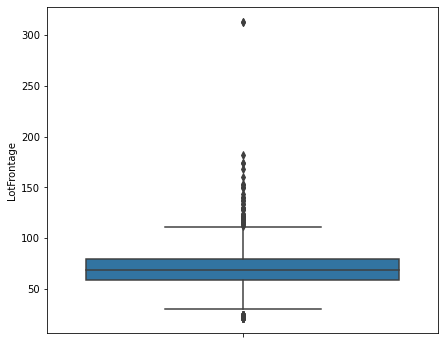

In [285]:
#Now we have all the columns with non null values except LotFrontage, let's see what we can do with this column
#Analyze the LotFrontage column
plt.figure(figsize=(7,6))
sns.boxplot(y=df.LotFrontage)
plt.show()

#As we can see that there are some outliers in this variable, so let's replace the missing values in this field with the median
#value

In [286]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)

In [287]:
df['LotFrontage'].isnull().sum()
#So, now we dont have any missing values in the data

0

# Data Quality and other data checks

Data type check and convert the features into correct data type

In [288]:
#df.info()
#Categorical Data types
categorical_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                        'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl',
                        'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                        'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
                        'Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                        'KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars',
                        'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

#Set the datatype of these columns as categorical
df[categorical_features] = df[categorical_features].astype('category')
#Create a list for numerical features using list comprehension
numerical_features = [x for x in df.columns if x not in categorical_features]
numerical_features

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1451 non-null   int64   
 1   MSSubClass     1451 non-null   category
 2   MSZoning       1451 non-null   category
 3   LotFrontage    1451 non-null   float64 
 4   LotArea        1451 non-null   int64   
 5   Street         1451 non-null   category
 6   Alley          1451 non-null   category
 7   LotShape       1451 non-null   category
 8   LandContour    1451 non-null   category
 9   Utilities      1451 non-null   category
 10  LotConfig      1451 non-null   category
 11  LandSlope      1451 non-null   category
 12  Neighborhood   1451 non-null   category
 13  Condition1     1451 non-null   category
 14  Condition2     1451 non-null   category
 15  BldgType       1451 non-null   category
 16  HouseStyle     1451 non-null   category
 17  OverallQual    1451 non-null   ca

In [290]:
#Check duplicates
df.duplicated().sum()
#There are no suplicates in the dataset

0

In [291]:
#Drop the id column, as it is of no use for prediction
df.drop('Id',axis = 1,inplace = True)

Mode percentage for each categorical variable, i.e. how many categorical variables have same value for most of the rows

In [292]:
mode_perc = []

for i in categorical_features:
    mode_perc.append(round(df[i].value_counts()[0]/len(df[i])*100,2))

mode = pd.DataFrame({'col_name': categorical_features,'mode_perc':mode_perc})
mode.sort_values(by='mode_perc',ascending = False)

,col_name,mode_perc
6,Utilities,99.93
2,Street,99.59
50,PoolQC,99.52
11,Condition2,98.97
17,RoofMatl,98.21
29,Heating,97.79
52,MiscFeature,96.28
38,KitchenAbvGr,95.38
8,LandSlope,94.62
34,BsmtHalfBath,94.35


Let's drop the ones which has more than 90% same value i.e. mode 

In [293]:
drop_cols = mode[mode['mode_perc']>80]
drop_list = list(drop_cols['col_name'])
df.drop(drop_list,axis = 1,inplace = True)

In [294]:
df.shape

(1451, 54)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1451 non-null   category
 1   MSZoning       1451 non-null   category
 2   LotFrontage    1451 non-null   float64 
 3   LotArea        1451 non-null   int64   
 4   LotShape       1451 non-null   category
 5   LotConfig      1451 non-null   category
 6   Neighborhood   1451 non-null   category
 7   HouseStyle     1451 non-null   category
 8   OverallQual    1451 non-null   category
 9   OverallCond    1451 non-null   category
 10  YearBuilt      1451 non-null   int64   
 11  YearRemodAdd   1451 non-null   int64   
 12  RoofStyle      1451 non-null   category
 13  Exterior1st    1451 non-null   category
 14  Exterior2nd    1451 non-null   category
 15  MasVnrType     1451 non-null   category
 16  MasVnrArea     1451 non-null   float64 
 17  ExterQual      1451 non-null   ca

In [296]:
#Function to recalcuate the list of categorical and numerical features everytime we drop or add a variable

def recalculate_feature_list(df):

    numerical_features =  [x for x in df.columns if (df[x].dtype == 'int64' or df[x].dtype == 'float64' or df[x].dtype == 'object')]
    categorical_features =  [x for x in df.columns if (df[x].dtype != 'int64' and df[x].dtype != 'float64' and df[x].dtype != 'object')]
    return(categorical_features,numerical_features)

In [297]:
categorical_features, numerical_features = recalculate_feature_list(df)

# EDA Univariate and Bivariate Analysis

MSSubClass Analysis:
******************************************
MSSubClass Histogram:


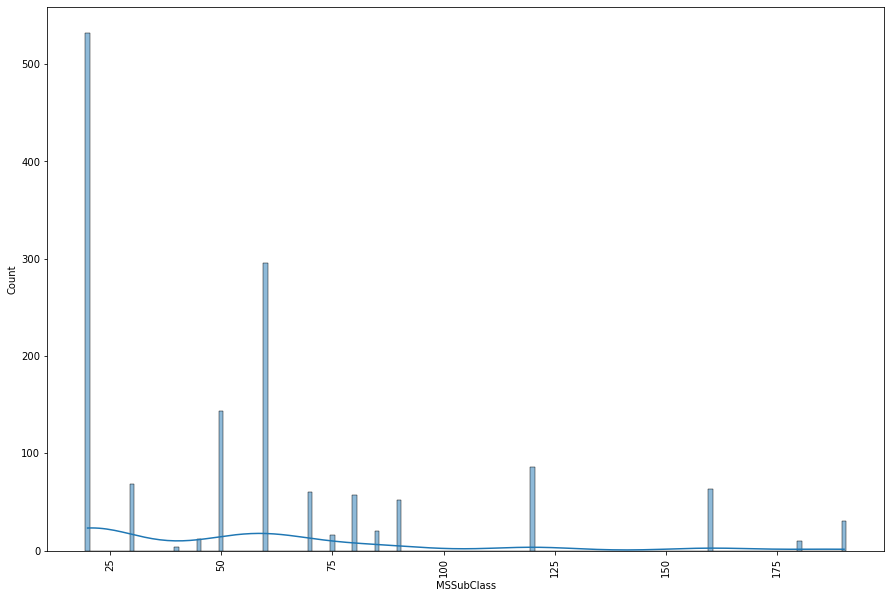

************************************************************************************
MSZoning Analysis:
******************************************
MSZoning Histogram:


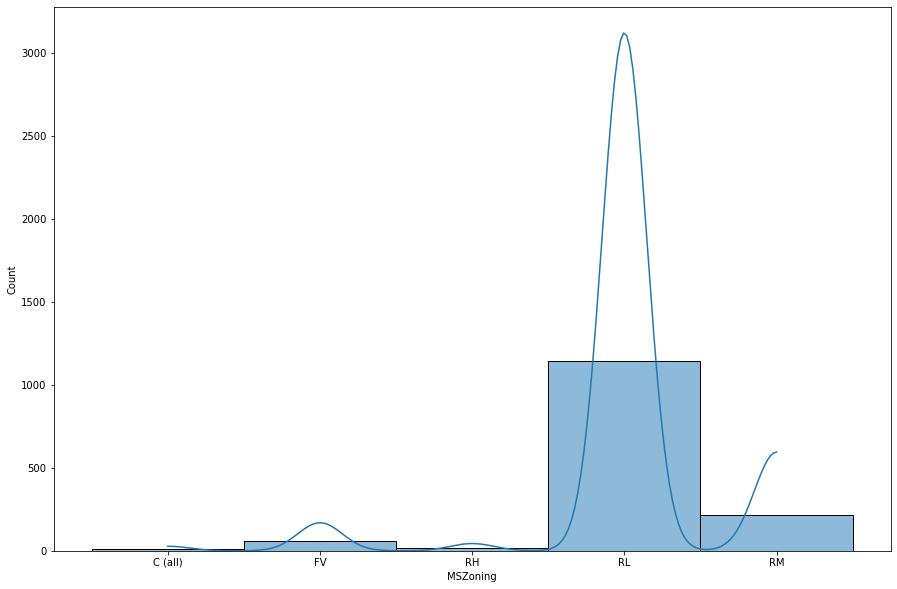

************************************************************************************
LotShape Analysis:
******************************************
LotShape Histogram:


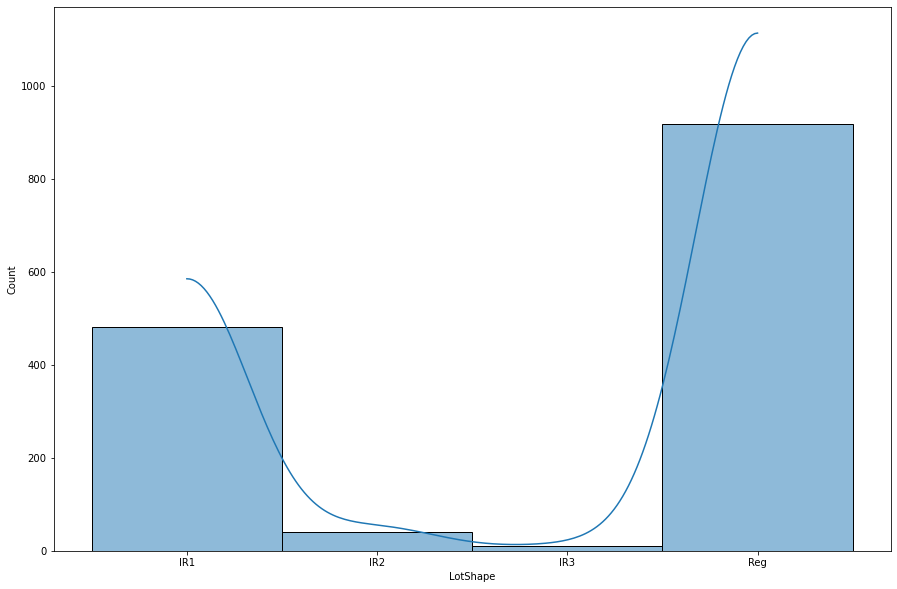

************************************************************************************
LotConfig Analysis:
******************************************
LotConfig Histogram:


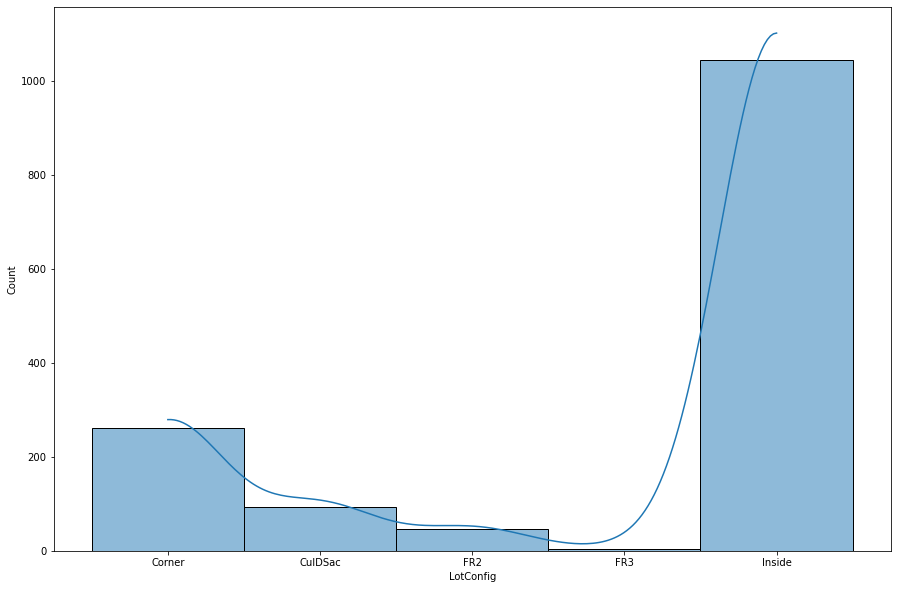

************************************************************************************
Neighborhood Analysis:
******************************************
Neighborhood Histogram:


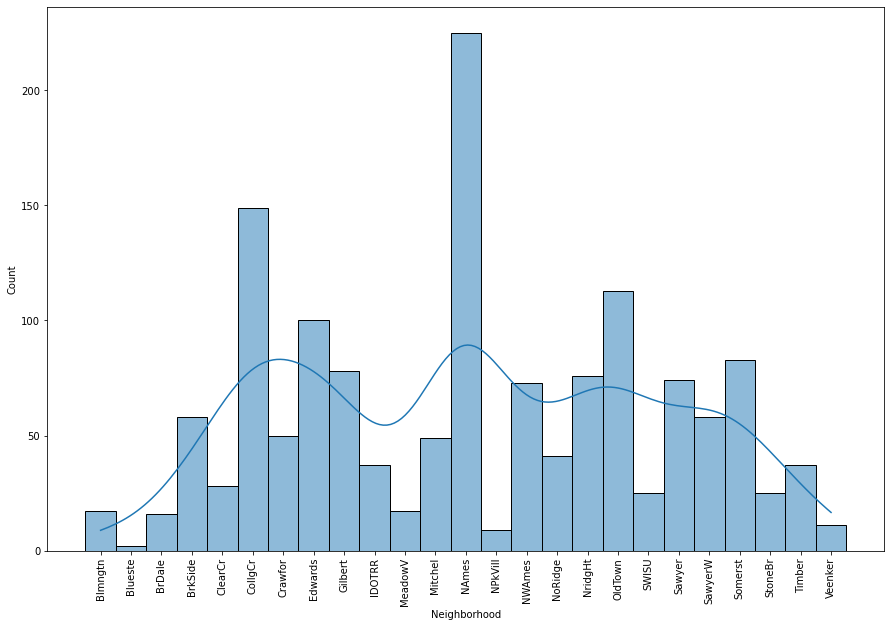

************************************************************************************
HouseStyle Analysis:
******************************************
HouseStyle Histogram:


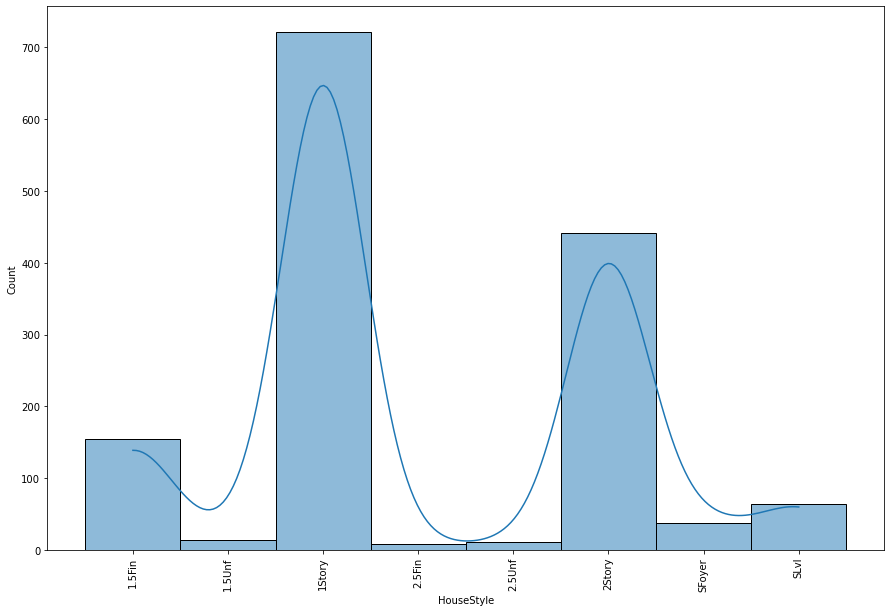

************************************************************************************
OverallQual Analysis:
******************************************
OverallQual Histogram:


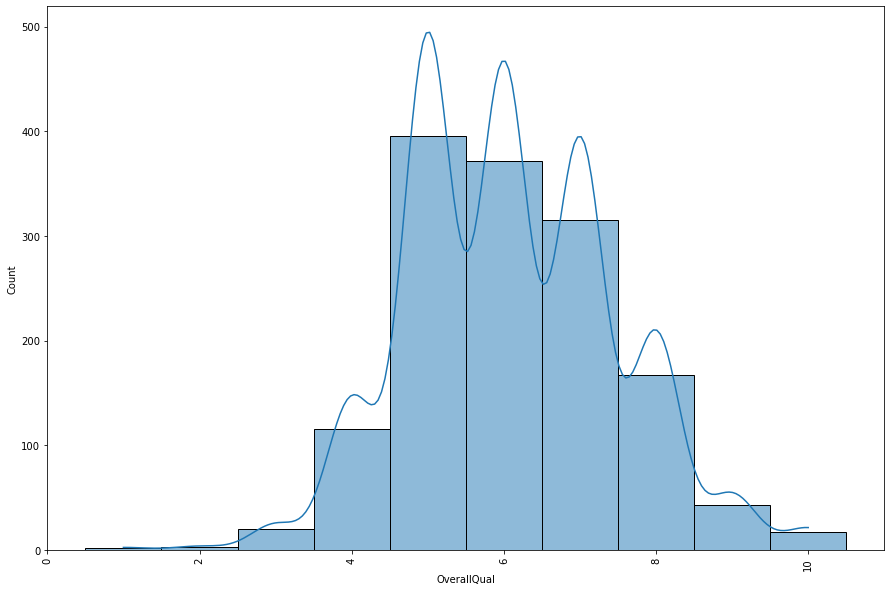

************************************************************************************
OverallCond Analysis:
******************************************
OverallCond Histogram:


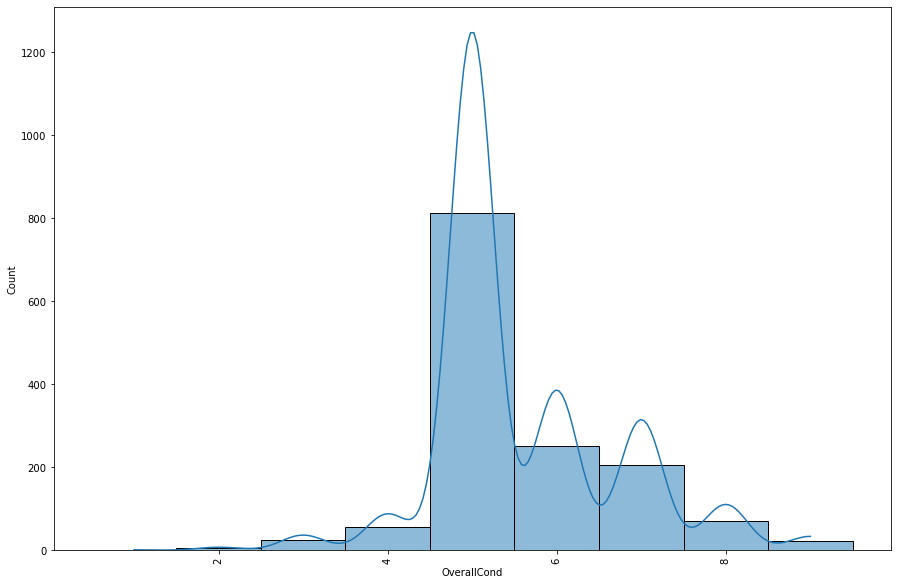

************************************************************************************
RoofStyle Analysis:
******************************************
RoofStyle Histogram:


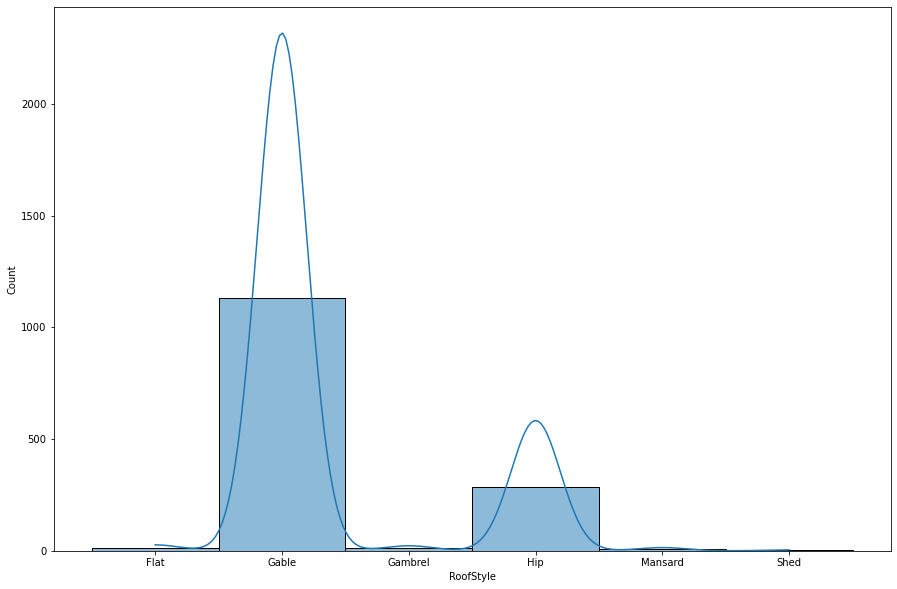

************************************************************************************
Exterior1st Analysis:
******************************************
Exterior1st Histogram:


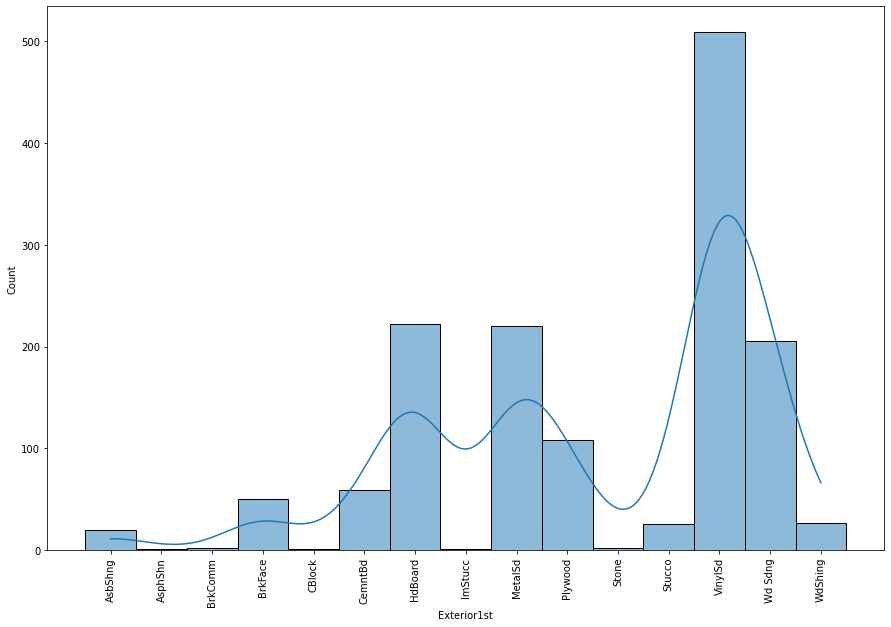

************************************************************************************
Exterior2nd Analysis:
******************************************
Exterior2nd Histogram:


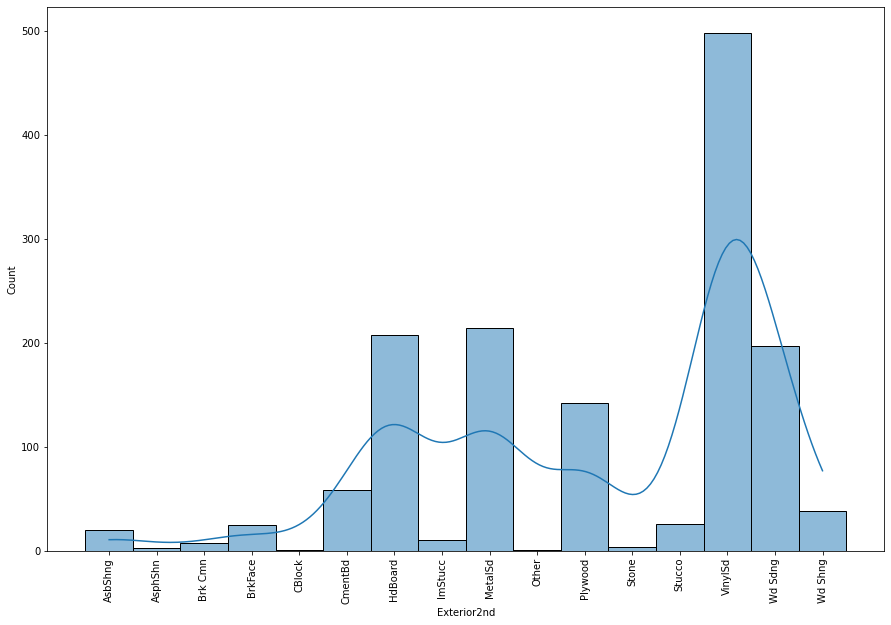

************************************************************************************
MasVnrType Analysis:
******************************************
MasVnrType Histogram:


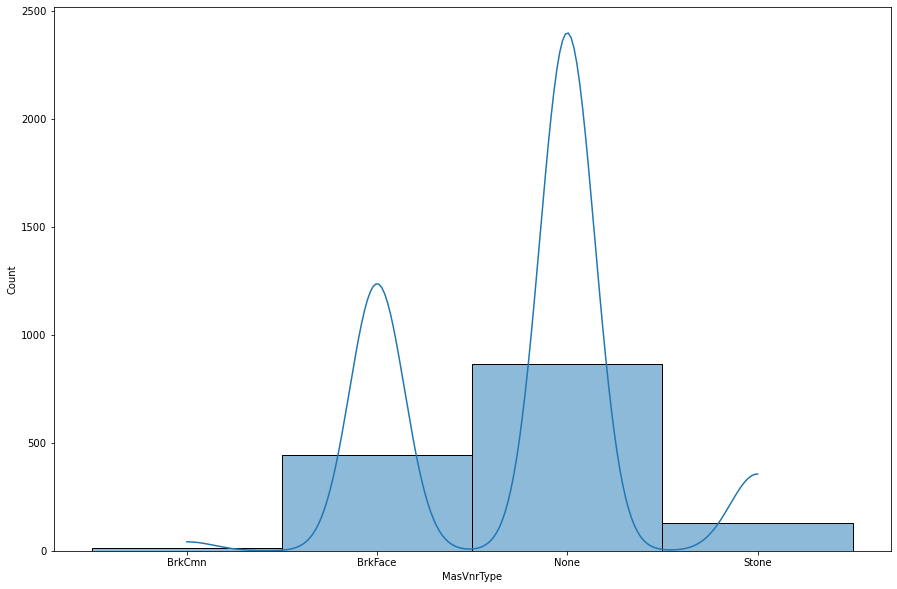

************************************************************************************
ExterQual Analysis:
******************************************
ExterQual Histogram:


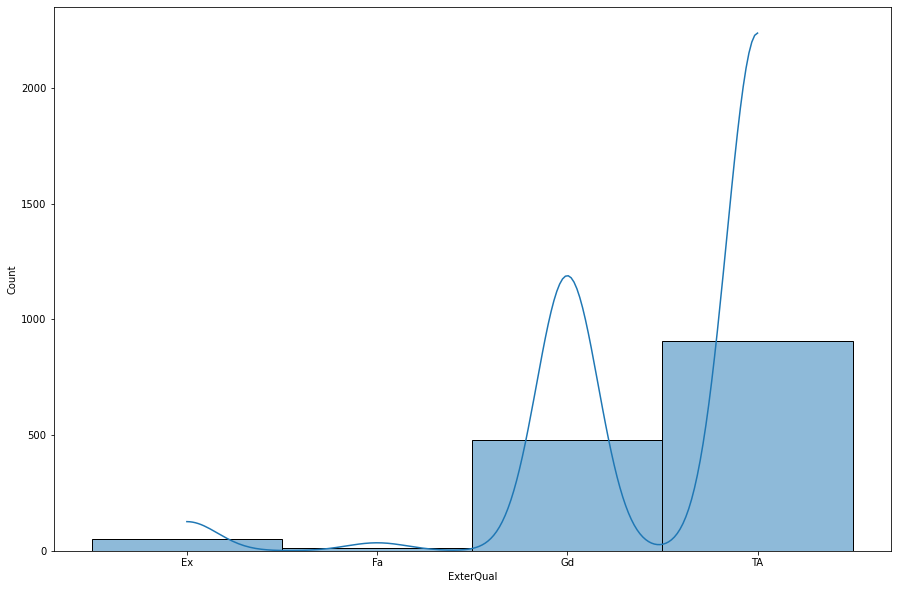

************************************************************************************
Foundation Analysis:
******************************************
Foundation Histogram:


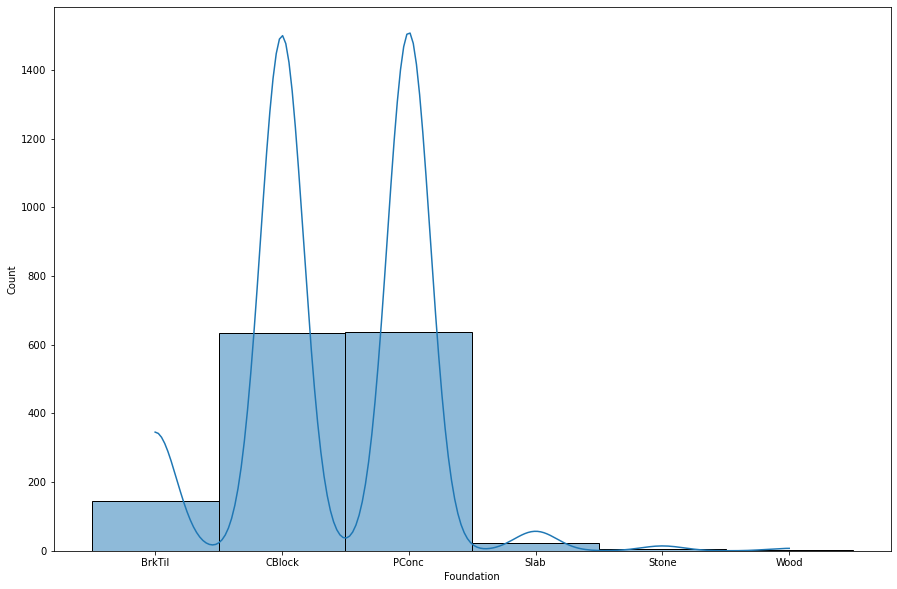

************************************************************************************
BsmtQual Analysis:
******************************************
BsmtQual Histogram:


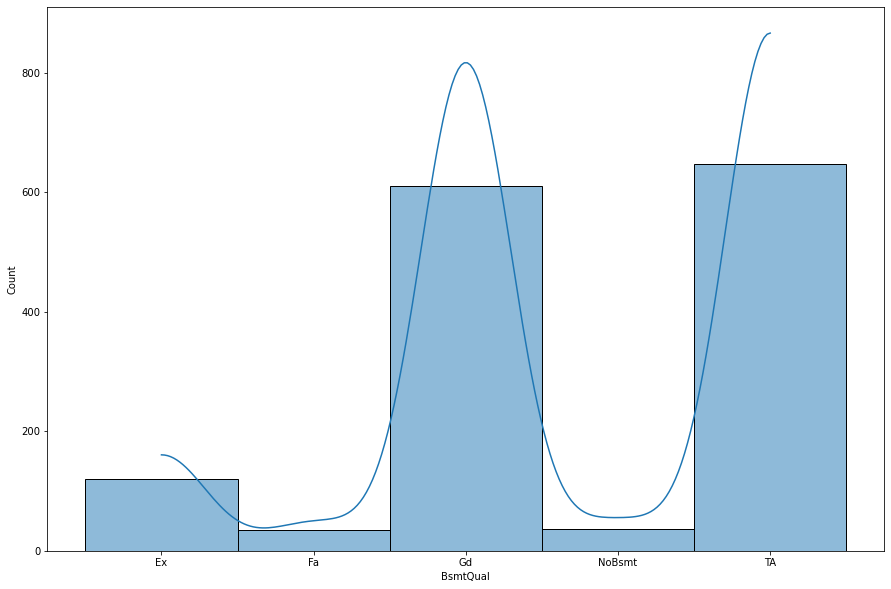

************************************************************************************
BsmtExposure Analysis:
******************************************
BsmtExposure Histogram:


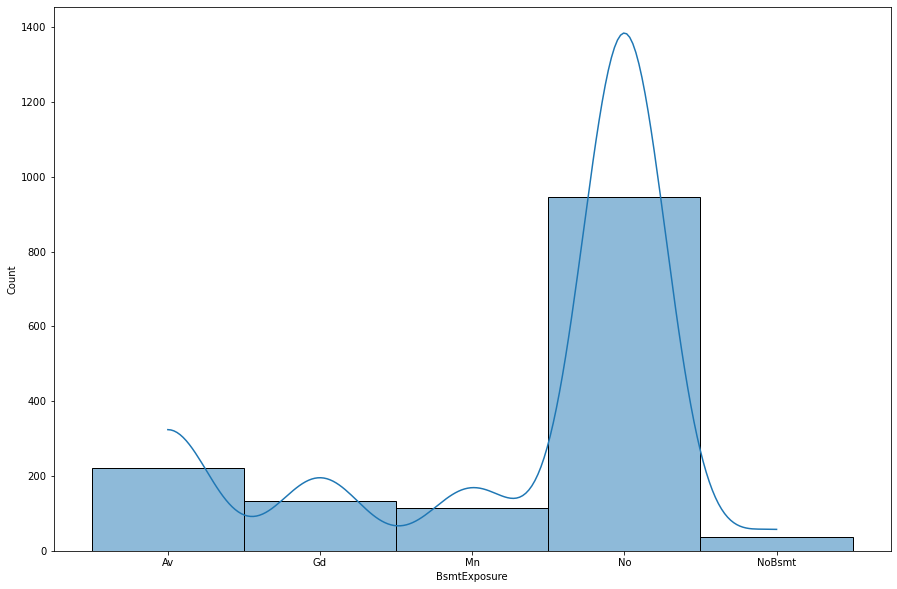

************************************************************************************
BsmtFinType1 Analysis:
******************************************
BsmtFinType1 Histogram:


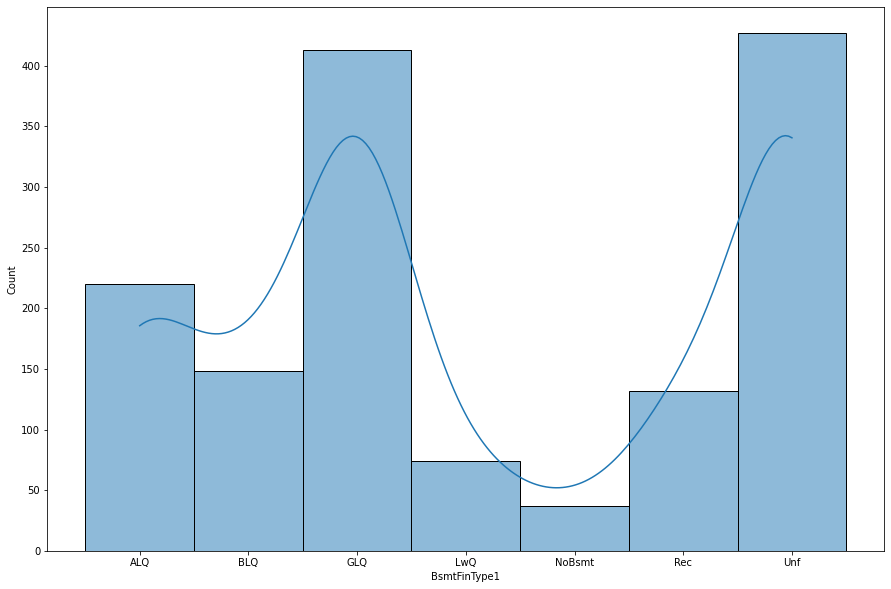

************************************************************************************
HeatingQC Analysis:
******************************************
HeatingQC Histogram:


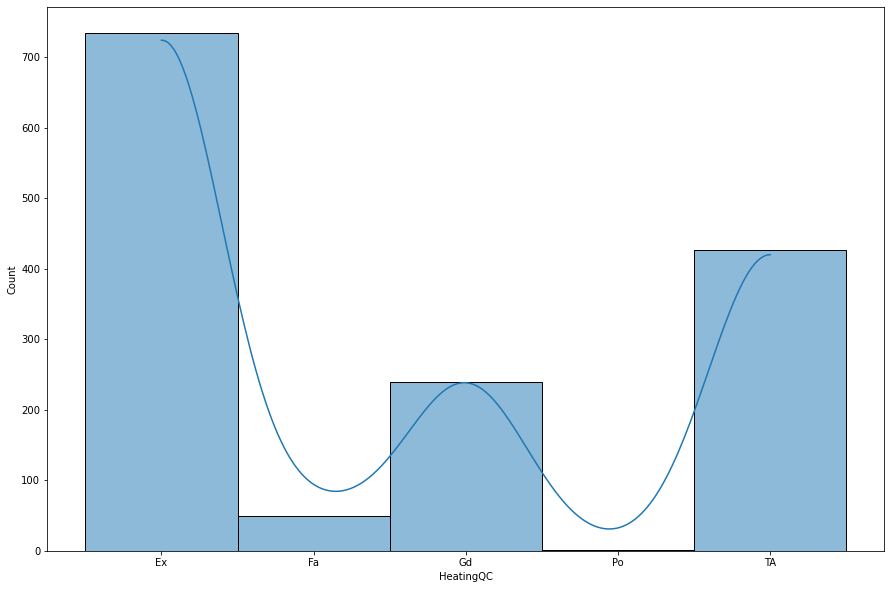

************************************************************************************
BsmtFullBath Analysis:
******************************************
BsmtFullBath Histogram:


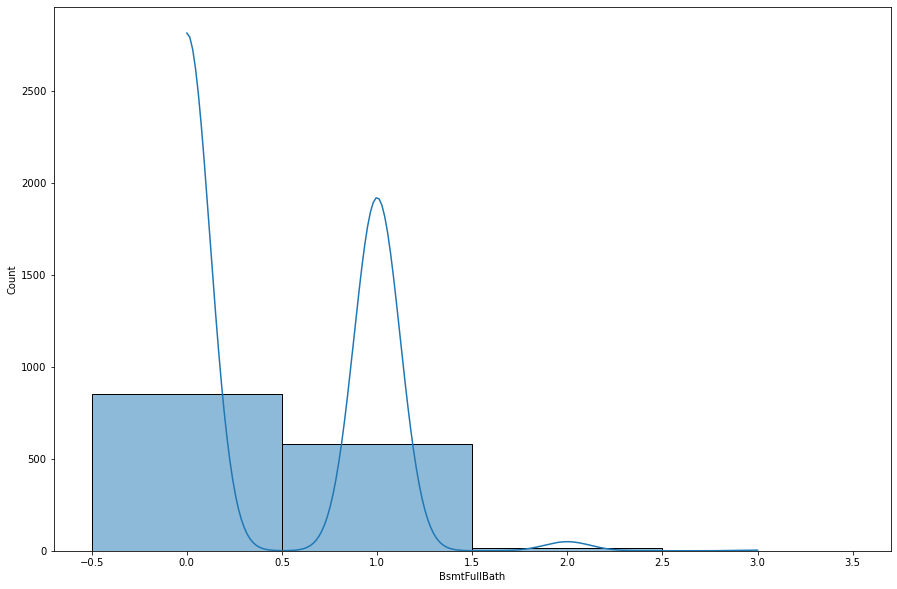

************************************************************************************
FullBath Analysis:
******************************************
FullBath Histogram:


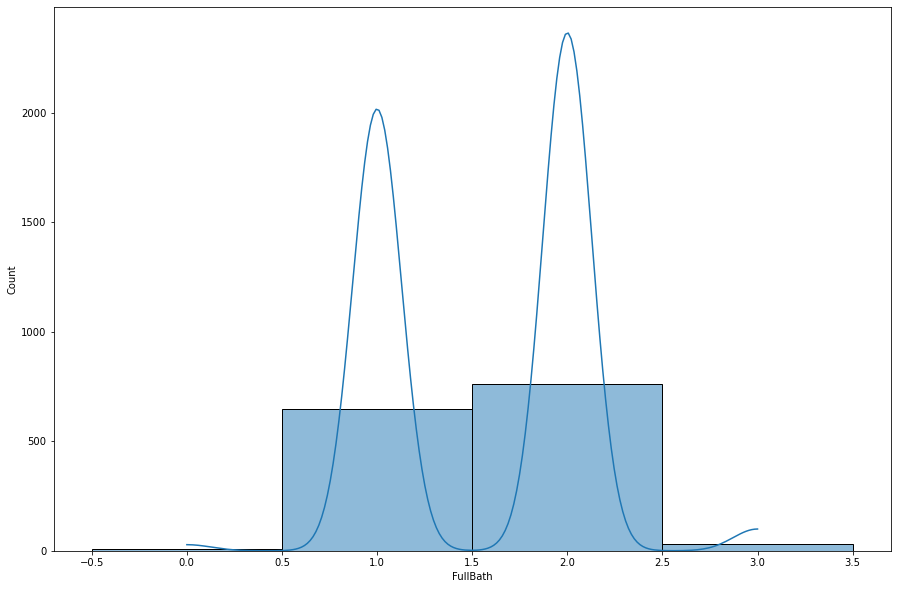

************************************************************************************
HalfBath Analysis:
******************************************
HalfBath Histogram:


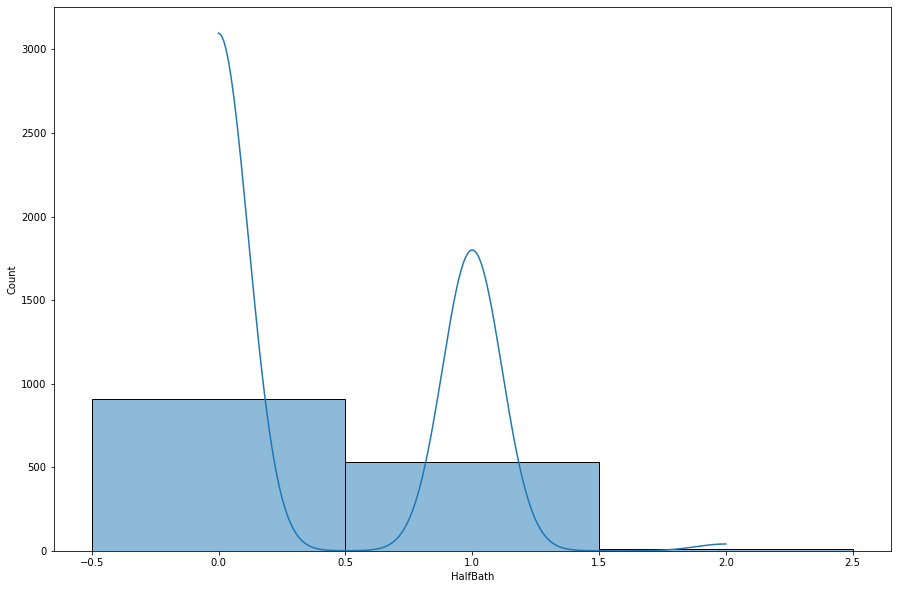

************************************************************************************
BedroomAbvGr Analysis:
******************************************
BedroomAbvGr Histogram:


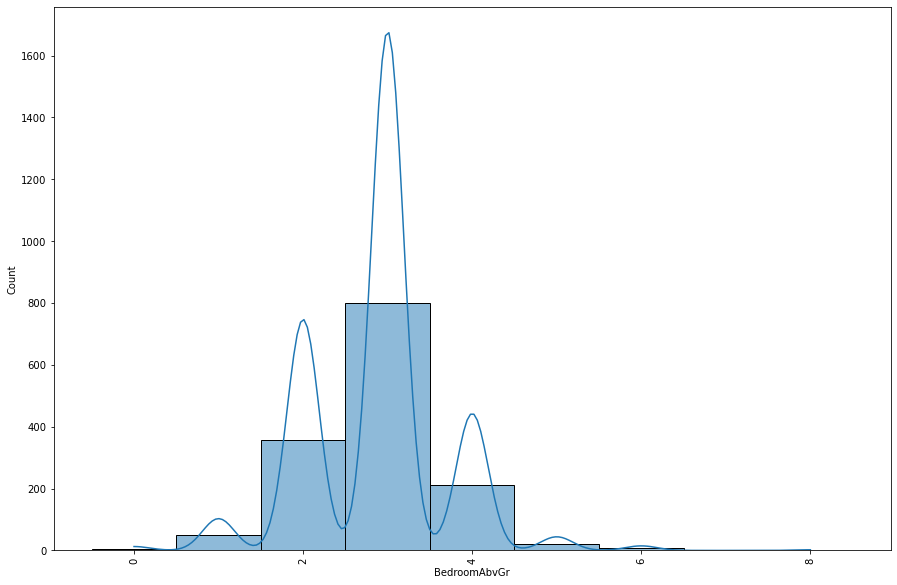

************************************************************************************
KitchenQual Analysis:
******************************************
KitchenQual Histogram:


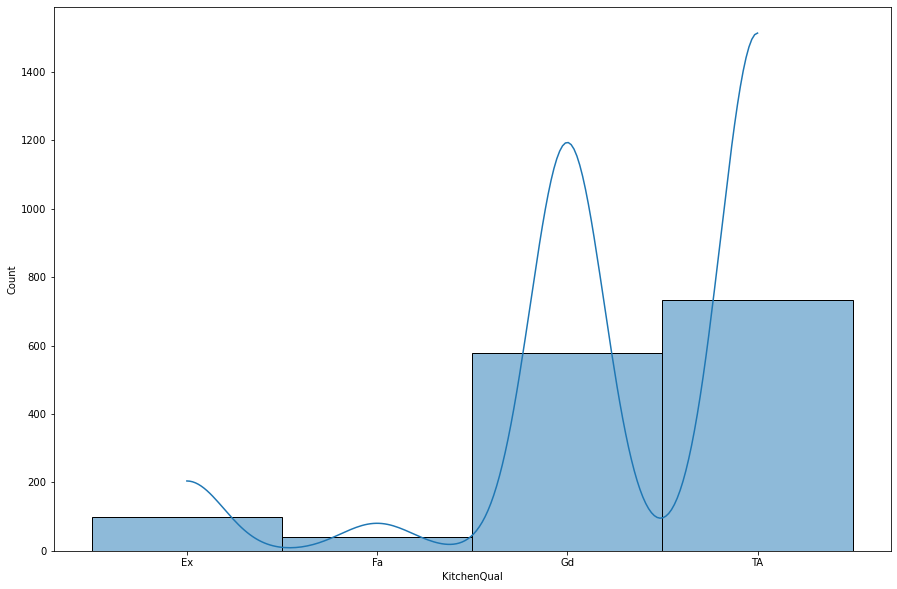

************************************************************************************
TotRmsAbvGrd Analysis:
******************************************
TotRmsAbvGrd Histogram:


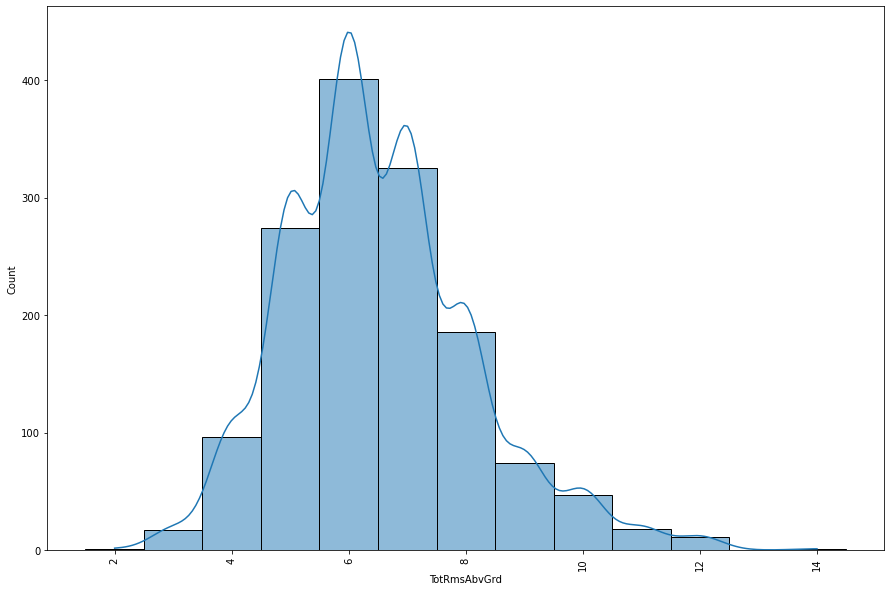

************************************************************************************
Fireplaces Analysis:
******************************************
Fireplaces Histogram:


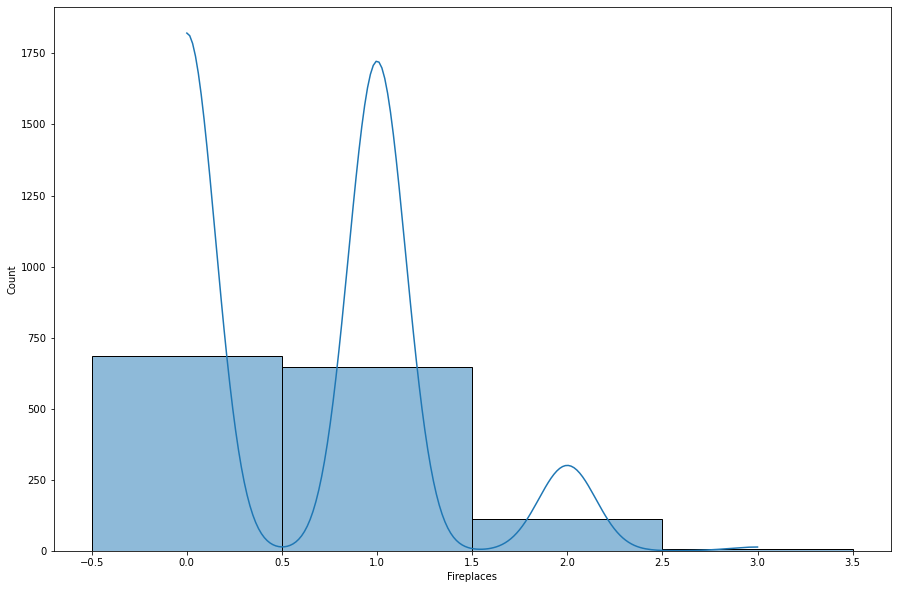

************************************************************************************
FireplaceQu Analysis:
******************************************
FireplaceQu Histogram:


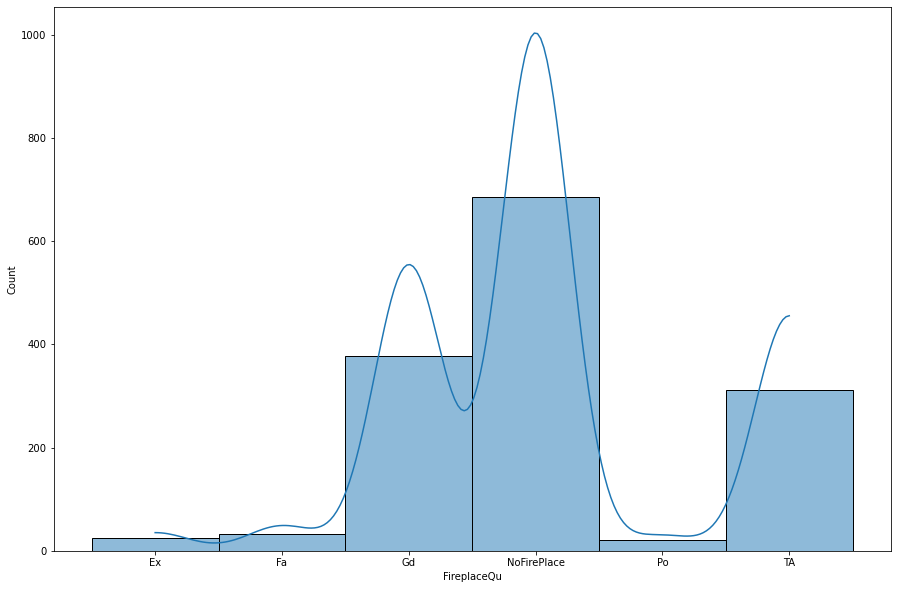

************************************************************************************
GarageType Analysis:
******************************************
GarageType Histogram:


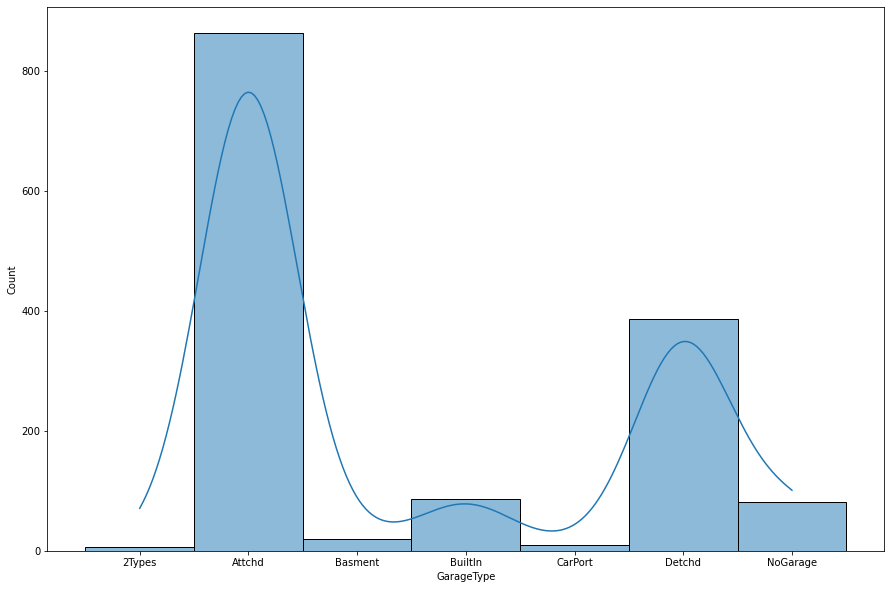

************************************************************************************
GarageFinish Analysis:
******************************************
GarageFinish Histogram:


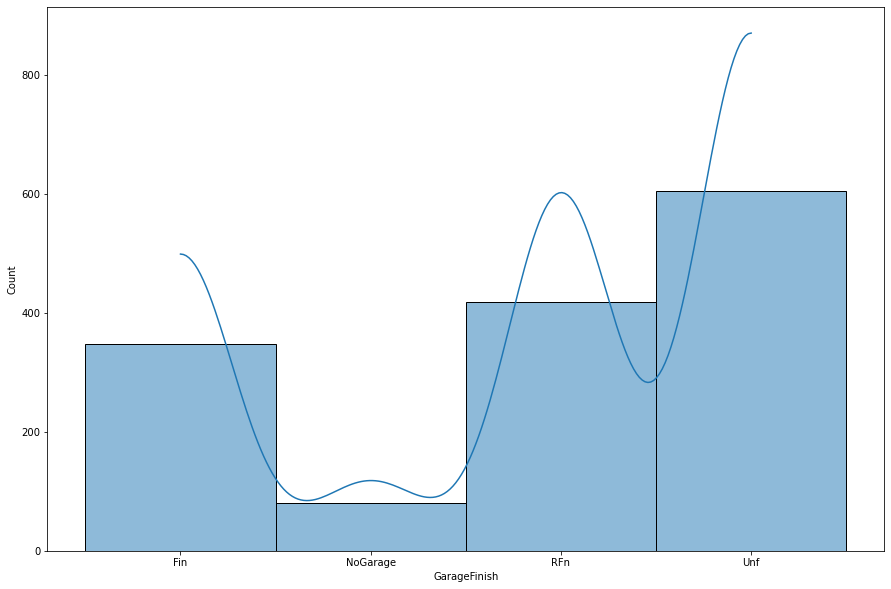

************************************************************************************
GarageCars Analysis:
******************************************
GarageCars Histogram:


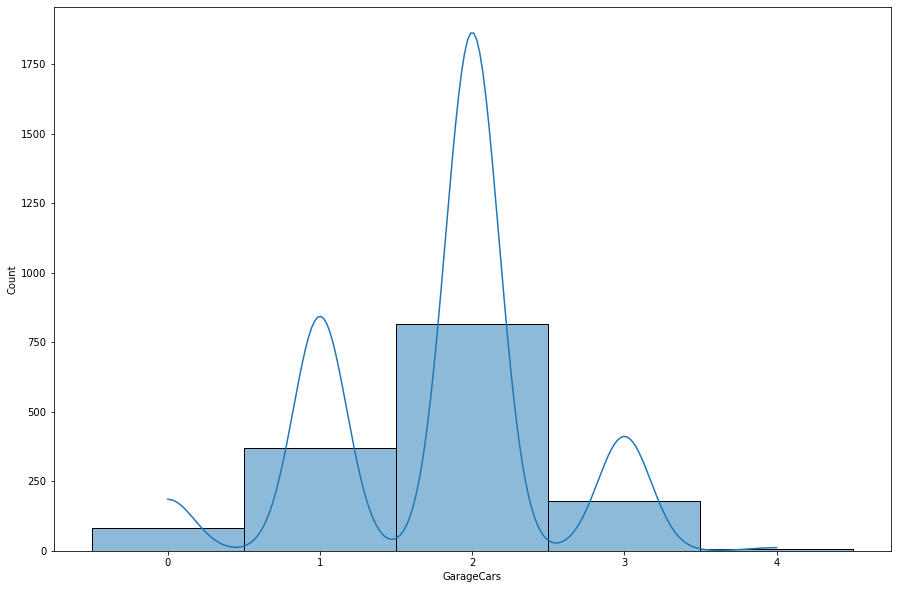

************************************************************************************


In [298]:
# Univariate Analysis of all the categorical variables using histogram and count_values function
# and also plot their relationship with the sale price
for i in categorical_features:
    print(i + ' Analysis:')
    #print(i + ' Value counts:')
    #print(df[i].value_counts())
    print('******************************************')
    print(i+ ' Histogram:')
    plt.figure(figsize=(15,10))
    sns.histplot(df[i],kde=True)
    if len(df[i].unique())>7:
        plt.xticks(rotation=90)
    plt.show()
    #print('******************************************')
    #print(i + ' Relationship with sale price:')
    #plt.figure(figsize=(15,10))
    #sns.boxplot(data = df, x = df[i],y = df['SalePrice'])
    #if len(df[i].unique())>7:
    #    plt.xticks(rotation=90)
    #plt.show()
    print('************************************************************************************')

# Bivariate Analysis of the categorical variables with the sale price

Observations: Need to write????????????????????????

Plot the sale price against the categorical variables in one chart

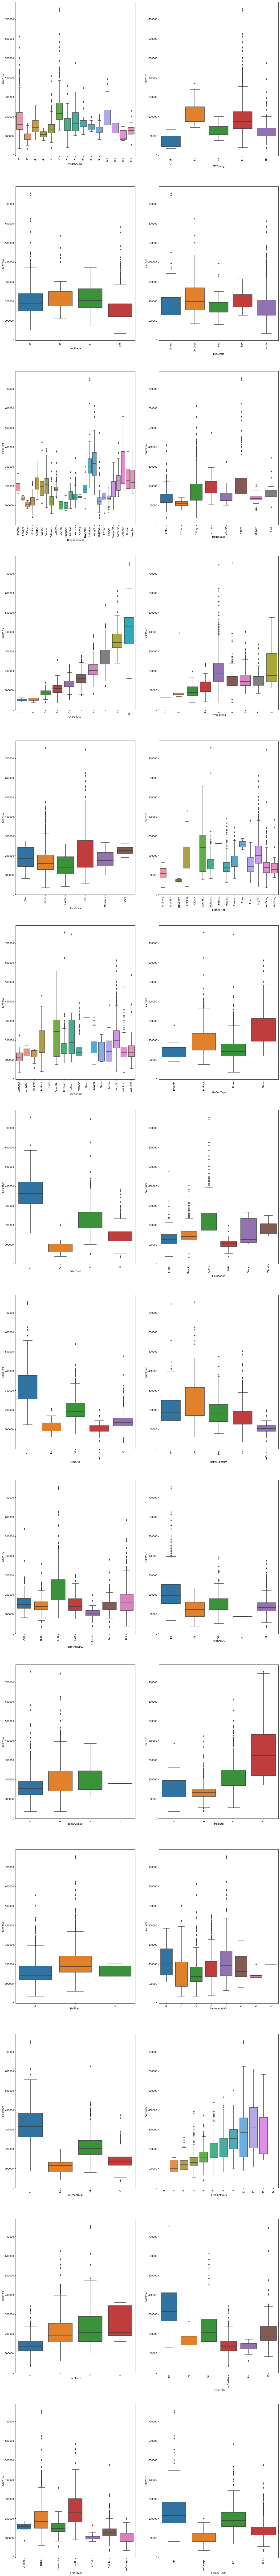

In [299]:
plt.figure(figsize=(20,200))

for i in range(1,len(categorical_features)):
    plt.subplot(len(categorical_features)//2,2,i)
    sns.boxplot(data = df, x = df[categorical_features[i-1]], y = df['SalePrice'])
    plt.xticks(rotation=90)
#fig.tight_layout()
plt.show()

Observation: With almost all the categorical variables, we could see that the target variable i.e. the house prices are changing, hence we can't drop any more categorical variable based on the visualization of the box plots above.

# Process Numerical variables and outlier treatment

In [300]:
from datetime import date
todays_date = date.today()
#Age of the building
df['PropertyAge'] = todays_date.year - df['YearBuilt']
df['YearsSinceRemodel'] = todays_date.year - df['YearRemodAdd']
df['GarageAge'] = todays_date.year - df['GarageYrBlt']
df['YearsSinceSold'] = todays_date.year - df['YrSold']

In [301]:
#Delete YearBuilt, YearRemodAdd, GarageYrBlt,YrSold and MoSold
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis = 1, inplace = True)

In [302]:
categorical_features, numerical_features = recalculate_feature_list(df)

In [303]:
#Fix GarageAge
df['GarageAge'] = df['GarageAge'].apply(lambda x: x if x!=2022 else 0)

In [304]:
df[numerical_features].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,YearsSinceRemodel,GarageAge,YearsSinceSold
count,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,69.845624,10507.808408,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999,50.907650,37.239835,41.210200,14.184700
std,22.044429,9992.987081,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273,30.190266,20.651334,25.996643,1.329376
min,21.000000,1300.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,12.000000,12.000000,0.000000,12.000000
25%,60.000000,7537.500000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000,22.000000,18.000000,19.000000,13.000000
50%,69.000000,9477.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000,50.000000,29.000000,38.000000,14.000000
75%,79.000000,11600.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,68.000000,56.000000,60.000000,15.000000
max,313.000000,215245.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,150.000000,72.000000,122.000000,16.000000


LotFrontage


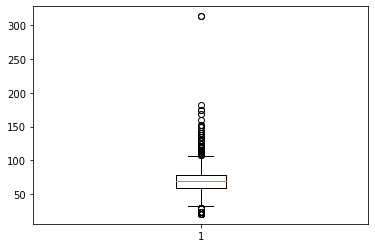

LotArea


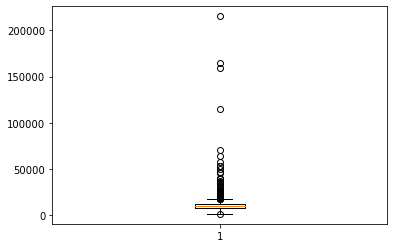

MasVnrArea


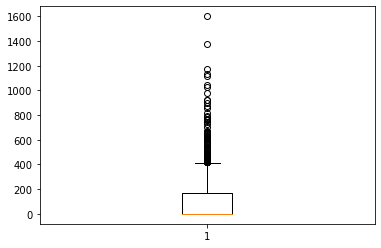

BsmtFinSF1


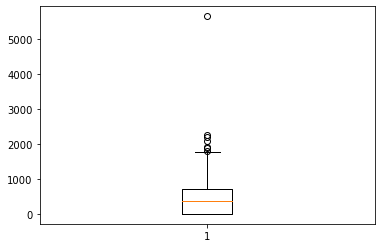

BsmtFinSF2


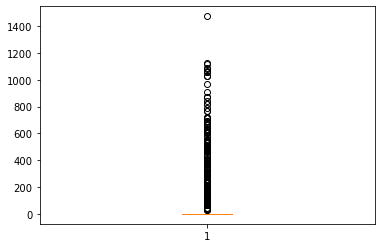

BsmtUnfSF


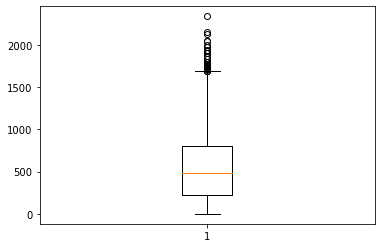

TotalBsmtSF


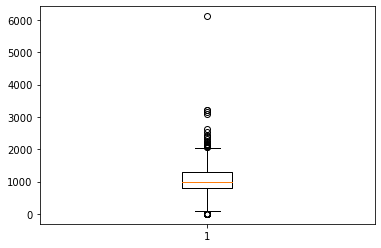

1stFlrSF


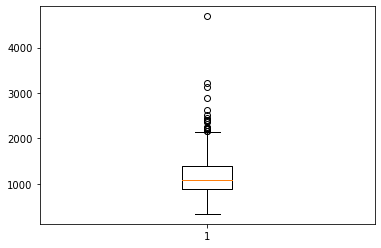

2ndFlrSF


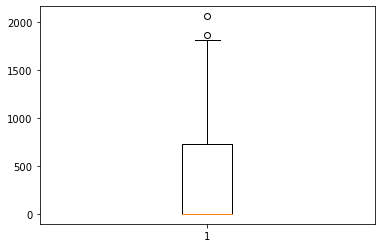

LowQualFinSF


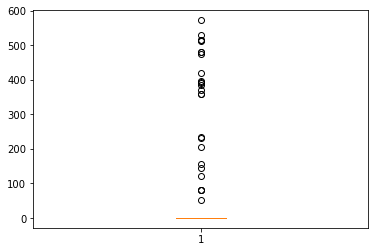

GrLivArea


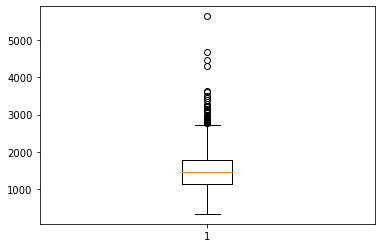

GarageArea


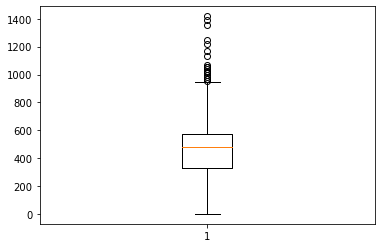

WoodDeckSF


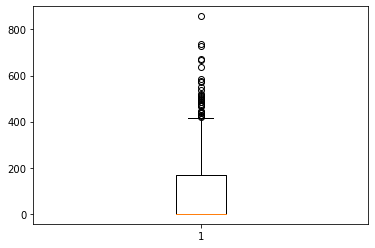

OpenPorchSF


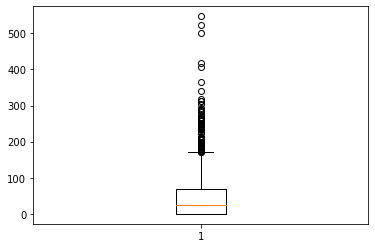

EnclosedPorch


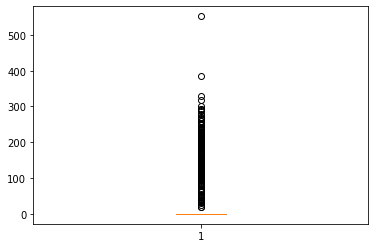

3SsnPorch


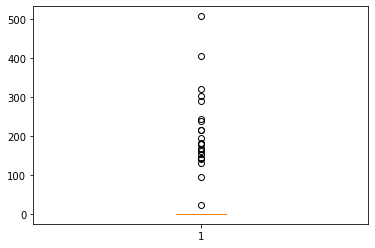

ScreenPorch


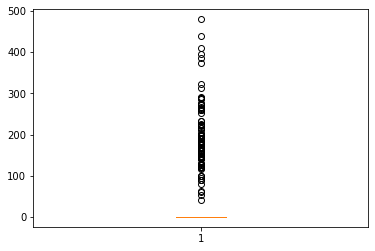

PoolArea


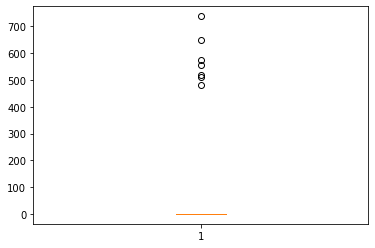

MiscVal


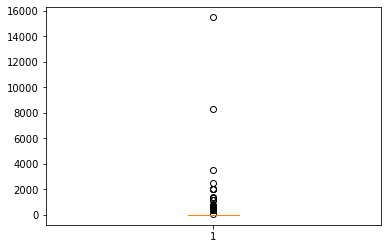

SalePrice


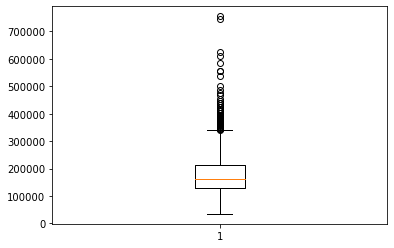

PropertyAge


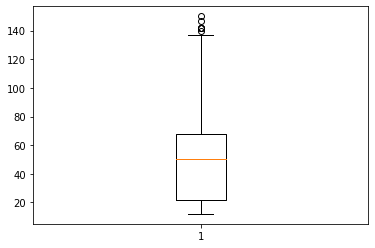

YearsSinceRemodel


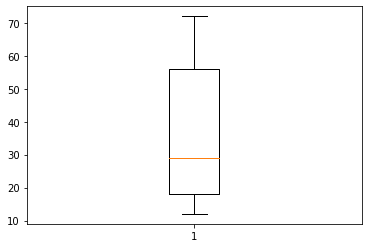

GarageAge


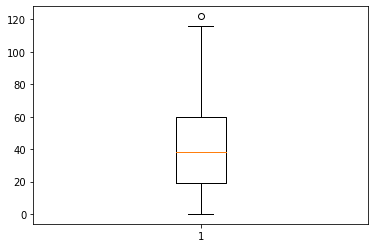

YearsSinceSold


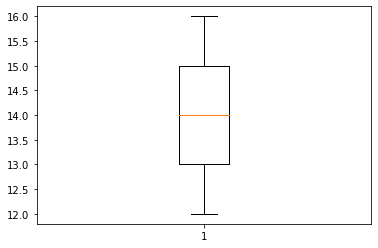

In [305]:
for i in numerical_features:
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [306]:
#Lets remove the outlier data based on the LotArea
q1 = df['LotArea'].quantile(.25)
q3 = df['LotArea'].quantile(.75)
iqr = q3-q1
iqr

df = df[(df['LotArea'] > q1-1.5*iqr) & (df['LotArea'] < q3+1.5*iqr)]

In [307]:
df.shape
#We have discarded 76 data points out of a total of 1460 data points so far which is around 5% of the total dataset

(1384, 53)

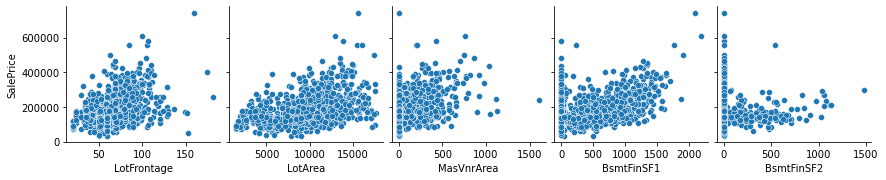

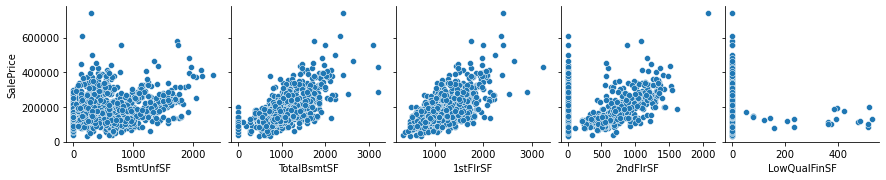

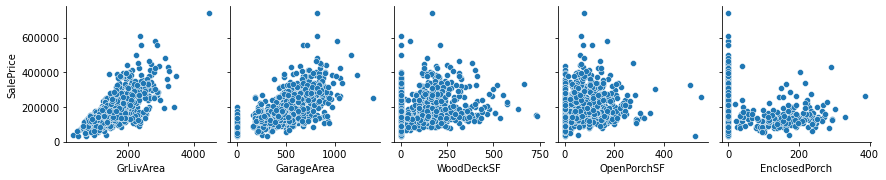

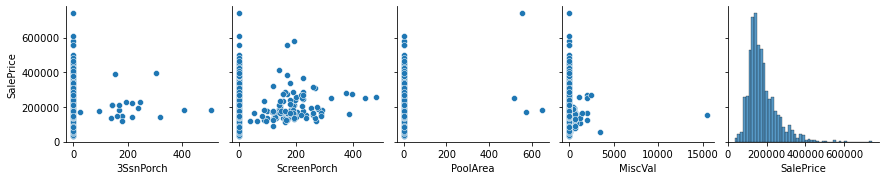

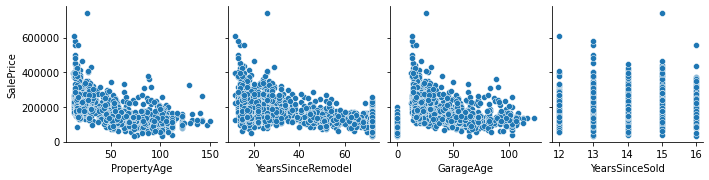

In [308]:
#Visualizing numeric variable pairplot to see how they are correlated

sns.pairplot(data = df, x_vars = numerical_features[0:5], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[5:10], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[10:15], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[15:20], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[20:25], y_vars = ['SalePrice'])
plt.show()
#sns.pairplot(data = df, x_vars = numerical_variables[25:30], y_vars = ['SalePrice'])
#plt.show()

In [309]:
#Drop PoolArea,MiscVal,3SsnPorch,LowQualFinSF
df.drop(['PoolArea','MiscVal','3SsnPorch','LowQualFinSF'],axis = 1, inplace = True)

In [310]:
categorical_features, numerical_features = recalculate_feature_list(df)

In [311]:
#sns.pairplot(df[numerical_features])

<AxesSubplot:>

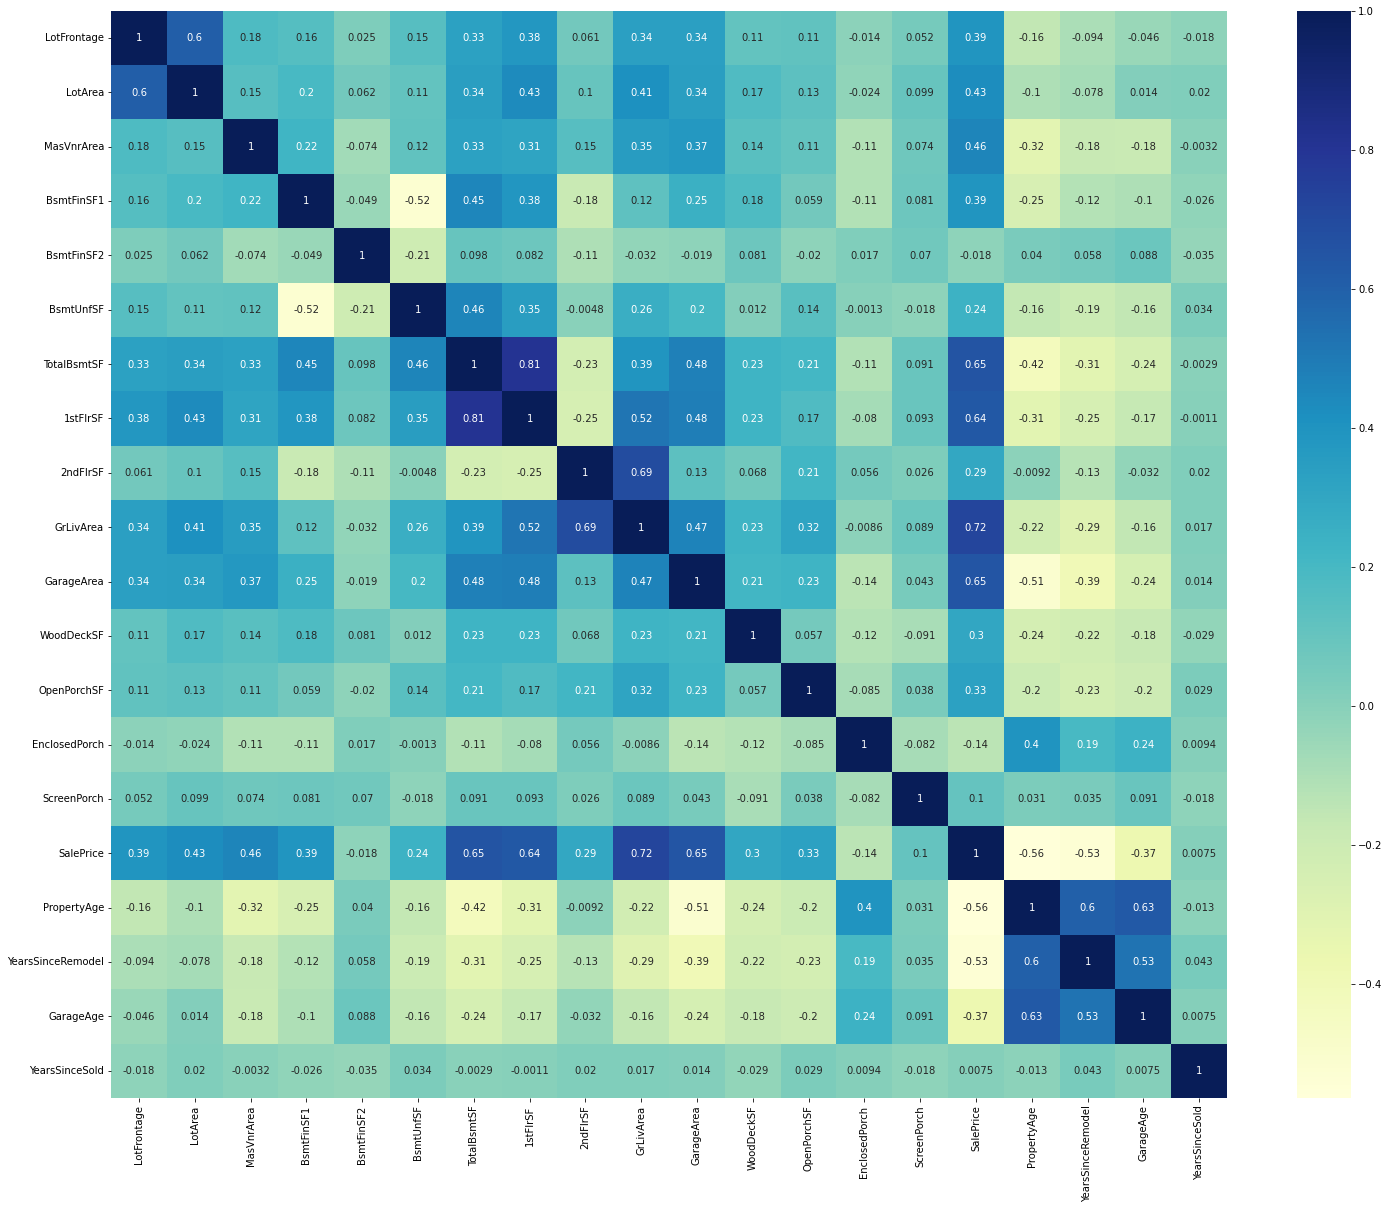

In [312]:
plt.figure(figsize=(25,20))
sns.heatmap(df[numerical_features].corr(),annot = True,cmap="YlGnBu")

In [313]:
df.drop('TotalBsmtSF',axis=1,inplace = True)
#Drop TotalBsmtSF as it has a correlation of 81% with 1stFlrSF

In [314]:
categorical_features, numerical_features = recalculate_feature_list(df)

In [315]:
df.shape

(1384, 48)

In [316]:
#Onehot encoding for categorical variables
for i in categorical_features:
    #Create dummies 
    temp = pd.get_dummies(df[i],drop_first=True,prefix = i)
    
    #Concat original dataframe with the new encoded datasets
    df = pd.concat([df,temp],axis =1)
    
    #Drop the columns for which dummy variables have been created
    df = df.drop(i,axis =1)

In [317]:
df.shape

(1384, 205)

In [318]:
import sklearn
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,train_size=0.7, random_state=100)

In [319]:
#Scale the numerical variables 

from sklearn.preprocessing import MinMaxScaler

#Instantiate an object

scaler = MinMaxScaler()

# Fit on data (only numeric variables)
num_vars = numerical_features

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,PropertyAge,YearsSinceRemodel,GarageAge,YearsSinceSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
564,0.366412,0.736153,0.00000,0.332724,0.0,0.170460,0.361896,0.700807,0.629939,0.424460,0.000000,0.073126,0.0,0.0,0.404156,0.130435,0.166667,0.258621,1.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
1034,0.221374,0.299448,0.00000,0.000000,0.0,0.427311,0.269682,0.000000,0.199165,0.172662,0.000000,0.000000,0.0,0.0,0.147116,0.521739,1.000000,0.724138,0.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
511,0.145038,0.329653,0.05875,0.000000,0.0,0.635392,0.449761,0.000000,0.332155,0.341007,0.179348,0.063985,0.0,0.0,0.290876,0.036232,0.066667,0.146552,1.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
525,0.312977,0.373566,0.00000,0.000000,0.0,0.583837,0.405394,0.000000,0.299390,0.325899,0.051630,0.263254,0.0,0.0,0.244644,0.036232,0.083333,0.146552,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0
1073,0.412214,0.401476,0.08750,0.244516,0.0,0.071993,0.158330,0.451893,0.350787,0.316547,0.342391,0.000000,0.0,0.0,0.216036,0.239130,0.550000,0.387931,0.25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [320]:
df_train.shape

(968, 205)

# Training the model -Using the basic Linear regression model

In [321]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [322]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [323]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-34594784312.92807
[-1.14278677e-02  3.04476695e-02  1.64211584e-02  1.53247070e-01
  9.48282339e-02  8.51800866e-02  7.50787263e-02  1.71884657e-02
  1.41214302e-01  2.73829823e-02 -3.46229523e-04  1.22722603e-02
  8.48861162e-03  2.73566051e-02 -1.21482895e-01 -1.59342973e-02
 -1.76724948e-02 -2.68541639e-05  3.90775255e-03  2.77519548e-02
  4.96610281e-02 -7.10273230e-03 -1.07269041e-02  2.28787067e-03
  2.55630611e-02 -1.70048847e-02 -2.62815094e-02 -4.89210981e-02
 -3.54119787e-02 -6.79194478e-02 -5.42627567e-02 -1.97987010e-02
  6.32785386e-02  5.29905002e-02  4.21320604e-02  3.05582294e-02
 -4.38467548e-03 -2.85321675e-02  2.10609596e-03  2.58727694e-03
 -8.78932190e-03 -2.22565953e-02 -2.28604527e-03  4.11088753e-02
  2.40070088e-02  9.75061591e-03  7.31265143e-04 -1.00205554e-02
  4.51469463e-02 -1.95492789e-02 -1.33040400e-02  2.34532675e-03
 -3.93877265e-03 -2.24600137e-02 -1.51476175e-02  2.88347382e-02
 -1.76131035e-02  2.77951483e-02  1.94224807e-02 -1.17120335e-02
 -5.20

In [324]:
#Test the model with the test data

In [325]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [326]:
y_test = df_test.pop('SalePrice')

X_test = df_test

In [327]:
y_test.shape

(416,)

In [328]:
y_test_predicted = lm.predict(X_test)

In [329]:
#Write a function to calculate the metrices
def calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test):
    #y_pred_train = lm.predict(X_train)
    #y_pred_test = lm.predict(X_test)

    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print('R2 train:',r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print('R2 test:',r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print('RSS train:',rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print('R2 test:',rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print('MSE train:',mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print('MSE test:',mse_test_lr)
    metric.append(mse_test_lr**0.5)

    return metric

In [330]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric_lr = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

# r2_train_lr = r2_score(y_train, y_pred_train)
# print('R2 train:',r2_train_lr)
# metric.append(r2_train_lr)

# r2_test_lr = r2_score(y_test, y_pred_test)
# print('R2 test:',r2_test_lr)
# metric.append(r2_test_lr)

# rss1_lr = np.sum(np.square(y_train - y_pred_train))
# print('RSS train:',rss1_lr)
# metric.append(rss1_lr)

# rss2_lr = np.sum(np.square(y_test - y_pred_test))
# print('R2 test:',rss2_lr)
# metric.append(rss2_lr)

# mse_train_lr = mean_squared_error(y_train, y_pred_train)
# print('MSE train:',mse_train_lr)
# metric.append(mse_train_lr**0.5)

# mse_test_lr = mean_squared_error(y_test, y_pred_test)
# print('MSE test:',mse_test_lr)
# metric.append(mse_test_lr**0.5)

R2 train: 0.9438827399230266
R2 test: -2.7380272472370775e+18
RSS train: 0.9167860671865834
R2 test: 2.0314854736382235e+19
MSE train: 0.000947093044614239
MSE test: 4.883378542399576e+16


As we can see here that the R2 of the training set is very good i.e. 94%, but for the test set it is practically a zero value. Its a clear case of overfitting. Reason looks like very high number of input features. We can definitely say that this model can't be used. Let's try one more generic model where we try to reduce the number of features using RFE, and see if it helps. 

# Model Using RFE

In [331]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [332]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 108),
 ('LotArea', False, 80),
 ('MasVnrArea', False, 89),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('1stFlrSF', False, 91),
 ('2ndFlrSF', False, 90),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 67),
 ('WoodDeckSF', False, 186),
 ('OpenPorchSF', False, 116),
 ('EnclosedPorch', False, 125),
 ('ScreenPorch', False, 43),
 ('PropertyAge', True, 1),
 ('YearsSinceRemodel', False, 76),
 ('GarageAge', False, 96),
 ('YearsSinceSold', False, 190),
 ('MSSubClass_30', False, 158),
 ('MSSubClass_40', False, 98),
 ('MSSubClass_45', False, 75),
 ('MSSubClass_50', False, 141),
 ('MSSubClass_60', False, 133),
 ('MSSubClass_70', False, 166),
 ('MSSubClass_75', False, 139),
 ('MSSubClass_80', False, 134),
 ('MSSubClass_85', False, 106),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 52),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 53),
 ('MSSubClass_190', False, 99),
 ('MSZoning_FV', False, 61),
 ('MSZoning_RH', False,

In [333]:
col = X_train.columns[rfe.support_]

In [334]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GrLivArea,PropertyAge,MSSubClass_90,MSSubClass_160,Neighborhood_Crawfor,Neighborhood_StoneBr,OverallQual_8,OverallQual_9,OverallQual_10,Foundation_Wood,TotRmsAbvGrd_11,GarageCars_4
564,0.332724,0.0,0.170460,0.629939,0.130435,0,0,0,0,0,0,0,0,0,0
1034,0.000000,0.0,0.427311,0.199165,0.521739,0,0,1,0,0,0,0,0,0,0
511,0.000000,0.0,0.635392,0.332155,0.036232,0,0,0,0,0,0,0,0,0,0
525,0.000000,0.0,0.583837,0.299390,0.036232,0,0,0,0,0,0,0,0,0,0
1073,0.244516,0.0,0.071993,0.350787,0.239130,0,0,0,0,0,0,0,0,0,0


In [335]:
lm_rfe = LinearRegression()
lm_rfe.fit(X_train_rfe,y_train)

LinearRegression()

In [336]:
print(lm_rfe.intercept_)
print(lm_rfe.coef_)

0.09990654235563329
[ 0.14526234  0.08442887  0.07727201  0.35465812 -0.18311515 -0.06452985
 -0.04881953  0.0785872   0.05793309  0.07074714  0.19257036  0.24102216
 -0.06656973  0.048206    0.05391233]


In [337]:
y_train_predict_rfe = lm_rfe.predict(X_train_rfe)

In [338]:
r2_score(y_train,y_train_predict_rfe)

0.8809350855632031

In [339]:
X_test_rfe = X_test[col]
y_test_predict_rfe = lm_rfe.predict(X_test_rfe)

In [340]:
r2_score(y_test,y_test_predict_rfe)

0.8730640898357611

In [341]:
#Using statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr_sm = sm.OLS(y_train,X_train_rfe_sm)

lr_model = lr_sm.fit()
final_model = lr_model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     469.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:01:47   Log-Likelihood:                 1632.1
No. Observations:                 968   AIC:                            -3232.
Df Residuals:                     952   BIC:                            -3154.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0999      0.007     14.915      0.000       0.087       0.113
BsmtFinSF1               0.1453      0.011     13.044      0.000       0.123       0.167
BsmtFinSF2               0.0844      0.014      6.023      0.000       0.057       0.112
BsmtUnfSF                0.0773      0.011      7.240      0.000       0.056       0.098
GrLivArea                0.3547      0.012     30.809      0.000       0.332       0.377
PropertyAge             -0.1831      0.008    -23.133      0.000      -0.199      -0.168
MSSubClass_90           -0.0645      0.008     -8.587      0.000      -0.079      -0.050
MSSubClass_160          -0.0488      0.007     -6.890      0.000      -0.063      -0.035
Neighborhood_Crawfor     0.0786      0.009      9.082      0.000       0.062       0.096
Neighborhood_StoneBr     0.0579      0.012      4.852      0.000       0.034       0.081
OverallQual_8            0.0707      0.006     12.758      0.000       0.060       0.082
OverallQual_9            0.1926      0.009     20.593      0.000       0.174       0.211
OverallQual_10           0.2410      0.018     13.357      0.000       0.206       0.276
Foundation_Wood         -0.0666      0.026     -2.529      0.012      -0.118      -0.015
TotRmsAbvGrd_11          0.0482      0.014      3.553      0.000       0.022       0.075
GarageCars_4             0.0539      0.026      2.041      0.042       0.002       0.106
==============================================================================
Omnibus:                      212.126   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1507.470
Skew:                           0.805   Prob(JB):                         0.00
Kurtosis:                       8.898   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have build the model with the columns suggested by RFE, we can now try to fine tune the model by manually eliminating the columns based on the P value and VIF. Since this involves multiple steps, let's write a function to drop a feature and rebuild the model, calculate the VIF and show the results. It returns the X, X_sm and model itself in the response which can be used for the next stage of the analysis.

Function Name: rebuild_model_vif

Input - Column name to drop

    X (X dataset)

    y (y target variable)
Output - X (with dropped column)

     X_sm (X with constant)

     lm (linear model)

In [342]:
def rebuild_model_vif(column_name_drop,X,y):
    X = X.drop(column_name_drop,axis =1)
    
    #Build the model again
    X_sm = sm.add_constant(X)

    lr = sm.OLS(y,X_sm)

    lr_model = lr.fit()
    print(lr_model.summary())
    
    #VIF Calculation   

    # VIF dataframe
    vif = pd.DataFrame() #Empty DataFrame
    vif["feature"] = X.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    vif["VIF"] = round(vif["VIF"],2)


    print(vif)
    
    #Return the df by dropping the columns
    return X,X_sm,lr_model

In [343]:
#Drop GarageCars_4, high P value
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('Foundation_Wood',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     499.8
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:01:47   Log-Likelihood:                 1628.8
No. Observations:                 968   AIC:                            -3228.
Df Residuals:                     953   BIC:                            -3154.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0993 

In [344]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('GarageCars_4',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     536.2
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:01:48   Log-Likelihood:                 1626.7
No. Observations:                 968   AIC:                            -3225.
Df Residuals:                     954   BIC:                            -3157.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0982 

In [345]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('BsmtUnfSF',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     544.2
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:01:48   Log-Likelihood:                 1598.6
No. Observations:                 968   AIC:                            -3171.
Df Residuals:                     955   BIC:                            -3108.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1286 

In [346]:
#Prediction and model evaluation
X_test_rfe = X_test_rfe.drop(['GarageCars_4','BsmtUnfSF','Foundation_Wood'],axis = 1)
X_test_rfe_sm = sm.add_constant(X_test_rfe)
y_test_rfe_pred = final_model.predict(X_test_rfe_sm)

In [347]:
test_r2 = r2_score(y_test, y_test_rfe_pred)
test_r2

0.8633603048963154

In [348]:
y_pred_train = final_model.predict(X_train_rfe_sm)
y_pred_test = final_model.predict(X_test_rfe_sm)

metric_rfe = calculate_metrices(X_train_rfe_sm,X_test_rfe_sm,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.8724250115167153
R2 test: 0.8633603048963154
RSS train: 2.084188925163796
R2 test: 1.013801290712488
MSE train: 0.002153087732607227
MSE test: 0.002437022333443481


In [349]:
#Validate the assumption
res = y_test - y_test_rfe_pred

<AxesSubplot:ylabel='Density'>

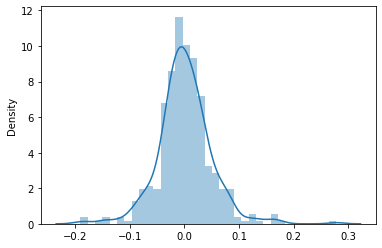

In [350]:
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice'>

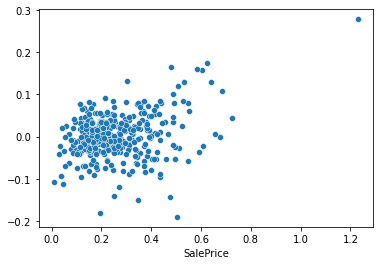

In [351]:
sns.scatterplot(x = y_test, y = res)

Looks like the error terms are not faily scattered and show some weak trend which is not a good sign, if the number of data points are increase it may show some pattern. 

So using the normal linear regression models, we can see some of the problems of the Linear regression models i.e. overfitting due to high number of features, and error terms not having constant variance and probably some auto - correlation too. 

Also the fact that using the RFE, we have reduced the number of features to 15, while we had 250+ features after creating dummies and 50+ features after the EDA. It also indictaes that we might still have some more scope to improve the model further than the one built by RFE. Let's see if Ridge and Lasso can improve this for us. 

# Ridge and Lasso Regression
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [352]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        #scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [353]:
ridge_res = pd.DataFrame(model_cv.cv_results_)
ridge_res = ridge_res[ridge_res['param_alpha']<=10]
ridge_res.head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016191,0.003865,0.006796,0.000748,0.0001,{'alpha': 0.0001},-0.027808,-0.027201,-0.029248,-0.028126,-0.032914,-0.029059,0.002039,23,-0.021484,-0.021103,-0.020783,-0.021392,-0.019348,-0.020822,0.000777
1,0.014191,0.001469,0.006796,0.000747,0.001,{'alpha': 0.001},-0.027800,-0.027202,-0.029241,-0.028121,-0.032906,-0.029054,0.002037,22,-0.021484,-0.021104,-0.020784,-0.021392,-0.019348,-0.020822,0.000777
2,0.012594,0.002245,0.005796,0.000748,0.01,{'alpha': 0.01},-0.027729,-0.027188,-0.029182,-0.028075,-0.032830,-0.029001,0.002023,21,-0.021493,-0.021112,-0.020789,-0.021386,-0.019356,-0.020827,0.000775
3,0.011793,0.001165,0.004795,0.000980,0.05,{'alpha': 0.05},-0.027478,-0.027064,-0.028996,-0.027897,-0.032594,-0.028806,0.002001,20,-0.021523,-0.021134,-0.020805,-0.021378,-0.019375,-0.020843,0.000773
4,0.013793,0.000747,0.005795,0.000749,0.1,{'alpha': 0.1},-0.027313,-0.026984,-0.028778,-0.027705,-0.032378,-0.028632,0.001968,19,-0.021563,-0.021157,-0.020815,-0.021382,-0.019392,-0.020862,0.000776
5,0.012993,0.000631,0.005396,0.001019,0.2,{'alpha': 0.2},-0.027048,-0.026890,-0.028407,-0.027475,-0.032044,-0.028373,0.001910,18,-0.021603,-0.021191,-0.020830,-0.021390,-0.019421,-0.020887,0.000776
6,0.013994,0.001263,0.005794,0.000747,0.3,{'alpha': 0.3},-0.026825,-0.026794,-0.028117,-0.027328,-0.031807,-0.028174,0.001878,17,-0.021631,-0.021235,-0.020844,-0.021416,-0.019464,-0.020918,0.000772
7,0.012793,0.002038,0.005796,0.001327,0.4,{'alpha': 0.4},-0.026626,-0.026702,-0.027938,-0.027186,-0.031639,-0.028018,0.001870,16,-0.021651,-0.021277,-0.020858,-0.021441,-0.019505,-0.020947,0.000766
8,0.012993,0.000894,0.004995,0.000635,0.5,{'alpha': 0.5},-0.026449,-0.026610,-0.027785,-0.027049,-0.031503,-0.027879,0.001870,14,-0.021668,-0.021321,-0.020871,-0.021474,-0.019546,-0.020976,0.000762
9,0.011993,0.003032,0.005396,0.001959,0.6,{'alpha': 0.6},-0.026289,-0.026524,-0.027642,-0.026924,-0.031424,-0.027760,0.001888,13,-0.021688,-0.021363,-0.020890,-0.021504,-0.019591,-0.021007,0.000756


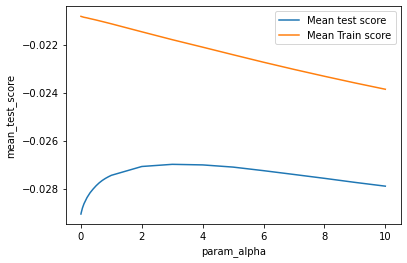

In [354]:
sns.lineplot(data = ridge_res, x = ridge_res['param_alpha'], y = ridge_res['mean_test_score'])
sns.lineplot(data = ridge_res, x = ridge_res['param_alpha'], y = ridge_res['mean_train_score'])
plt.legend(['Mean test score','Mean Train score'],loc='upper right')
plt.show()

#As we can see that the on the test data the error flattens out at around 4.0, this we can choose as the optimal 
#lambda

In [355]:
# Printing the best hyperparameter alpha, let's check what is the best parameter as per the GridSearch, 
print(model_cv.best_params_)

{'alpha': 3.0}


As per Gridsearch also, the optimal value of alpha is 3.0, let's build the model with alpha = 3

In [356]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.16718748e-03  3.75504761e-02  2.56684028e-02  8.79165219e-02
  4.67993859e-02  3.98044860e-02  9.67271356e-02  2.89326343e-02
  8.53600710e-02  3.12447190e-02  3.29165980e-03  1.33057695e-02
  3.95511577e-03  2.36616302e-02 -5.68247394e-02 -2.11749072e-02
 -1.49400274e-02 -4.87103258e-05 -7.46340665e-03  8.01189479e-03
  9.07459138e-03  3.20701187e-03  9.27008403e-03  1.12724277e-02
  6.20668510e-03 -3.07725973e-04 -8.95679277e-03 -2.97237860e-02
 -2.65541284e-02 -3.16438203e-02 -1.30952888e-02 -1.59713712e-02
  2.19973230e-02  1.26322221e-02  8.05948100e-03 -9.68170953e-04
 -2.51616866e-03 -1.11560287e-02  2.14537285e-03  7.94548766e-03
 -9.34205689e-03 -1.33039112e-02 -2.84351524e-04  6.28902345e-03
  9.84332722e-03  5.49251438e-03  6.25369026e-04 -8.87752224e-03
  3.42194000e-02 -2.42070677e-02 -1.44104402e-02 -1.00647677e-02
 -1.70214250e-02 -2.15160774e-02 -1.63516957e-02  1.55809158e-02
 -1.67977849e-02  2.71755171e-02  2.00373203e-02 -1.64221319e-02
 -7.18120119e-03 -1.03347

In [357]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge_3 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.9379805822214399
R2 test: 0.9047982441719915
RSS train: 1.013209448152273
R2 test: 0.7063515683586122
MSE train: 0.0010467039753639185
MSE test: 0.0016979605008620485


In [358]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.21020017e-03  3.88815349e-02  2.52010556e-02  7.05375543e-02
  3.36085197e-02  3.12296413e-02  8.40997361e-02  2.54334675e-02
  7.41867096e-02  3.04768362e-02  4.47418592e-03  1.40392212e-02
  3.01122154e-03  2.14041005e-02 -3.99079975e-02 -2.38199276e-02
 -1.30114888e-02  3.04276276e-05 -1.04239703e-02  4.53403433e-03
  6.43034441e-03  3.85032573e-03  9.92316016e-03  1.07788765e-02
  4.95013677e-03 -3.31765794e-04 -6.71841006e-03 -2.39260886e-02
 -2.26950607e-02 -2.46417838e-02 -8.00021730e-03 -1.55855858e-02
  1.71493080e-02  8.23977031e-03  6.10607575e-03 -4.36504725e-03
 -1.39509326e-03 -7.34541535e-03  1.79479671e-03  8.97135754e-03
 -8.97530190e-03 -9.51134583e-03  2.97741367e-04  3.20500221e-03
  8.01308644e-03  5.99218556e-03  9.28064121e-04 -7.35723184e-03
  3.14497869e-02 -2.30257554e-02 -1.42377707e-02 -9.63360957e-03
 -1.57195564e-02 -1.82935557e-02 -1.42832735e-02  1.09943367e-02
 -1.37357072e-02  2.57762367e-02  2.10911411e-02 -1.42520236e-02
 -6.72868263e-03 -9.38588

In [359]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge_6 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.9329725528122051
R2 test: 0.9004957888571498
RSS train: 1.0950254808692916
R2 test: 0.738273732325017
MSE train: 0.0011312246703195162
MSE test: 0.001774696471935137


# Lasso

In [360]:
params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [361]:
lasso_res = pd.DataFrame(model_cv.cv_results_)
lasso_res = lasso_res[lasso_res['param_alpha']<=.05]
lasso_res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058366,0.006648,0.005997,0.000632,0.0001,{'alpha': 0.0001},-0.024078,-0.025615,-0.026599,-0.026275,-0.031845,-0.026883,0.002629,1,-0.022662,-0.022479,-0.021871,-0.022422,-0.020589,-0.022004,0.000756
1,0.017789,0.001468,0.005597,0.000798,0.001,{'alpha': 0.001},-0.032429,-0.030563,-0.030799,-0.033299,-0.036955,-0.032809,0.002309,2,-0.030976,-0.031038,-0.031236,-0.030915,-0.029728,-0.030779,0.000536
2,0.013191,0.001832,0.004798,0.000748,0.01,{'alpha': 0.01},-0.055512,-0.053738,-0.054649,-0.051669,-0.064904,-0.056094,0.004586,3,-0.055137,-0.056831,-0.055530,-0.057251,-0.053783,-0.055706,0.001242
3,0.012195,0.001164,0.005395,0.000801,0.05,{'alpha': 0.05},-0.091095,-0.096444,-0.093450,-0.089228,-0.103601,-0.094764,0.005035,4,-0.094444,-0.094347,-0.094493,-0.097150,-0.091793,-0.094446,0.001695


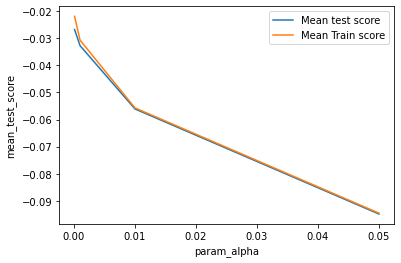

In [362]:
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_test_score'])
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_train_score'])
plt.legend(['Mean test score','Mean Train score'],loc='upper right')
plt.show()

In [363]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


Here the optimal value as per the grid search algorithm is 0.0001, if we increase the lambda, more number of features could be eliminated without compromising on the error, let's try that.

In [364]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [365]:
lasso.coef_

#We could see that many co efficents are zero, if we increase the lambda, to 0.0002, then more features could be eliminated

array([-0.00000000e+00,  3.37037997e-02,  1.52848172e-02,  1.20584968e-01,
        6.52484283e-02,  6.05929949e-02,  3.08942182e-02,  0.00000000e+00,
        2.14495065e-01,  3.04619593e-02,  0.00000000e+00,  4.43581401e-03,
        2.05940312e-03,  2.25022900e-02, -8.94188254e-02, -1.99652180e-02,
       -5.38267341e-03, -1.15450021e-04, -2.82167452e-04,  0.00000000e+00,
        1.88562438e-03,  0.00000000e+00,  5.21025352e-03,  7.56444995e-03,
        0.00000000e+00,  0.00000000e+00, -2.25021327e-03, -3.31891579e-02,
       -2.11090405e-02, -3.20732420e-02, -1.83883391e-03, -1.00521276e-02,
        1.61842979e-02,  0.00000000e+00,  0.00000000e+00, -7.47559975e-03,
       -0.00000000e+00, -0.00000000e+00,  1.62641605e-03,  4.57666910e-03,
       -4.04820829e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.06624512e-02,  1.41103462e-02,  0.00000000e+00,  0.00000000e+00,
        4.40674131e-02, -1.42841107e-02, -2.80250660e-03, -0.00000000e+00,
       -4.50564544e-03, -

In [366]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso_0001 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.9370182377888001
R2 test: 0.9127410476726371
RSS train: 1.02893124152687
R2 test: 0.6474197591598296
MSE train: 0.0010629454974451138
MSE test: 0.0015562974979803597


In [367]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [368]:
lasso.coef_

array([ 0.00000000e+00,  3.39862251e-02,  1.25390863e-02,  1.01762910e-01,
        4.35976076e-02,  4.40999536e-02,  4.42472543e-02,  0.00000000e+00,
        2.13474851e-01,  3.48289024e-02,  0.00000000e+00,  4.61458438e-04,
        0.00000000e+00,  1.95298258e-02, -8.09627960e-02, -2.40666704e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  6.05666620e-03,  5.95554079e-03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.90395761e-02,
       -1.40420086e-02, -2.28291555e-02, -0.00000000e+00, -4.99710895e-03,
        1.15478270e-02,  0.00000000e+00,  0.00000000e+00, -7.69470656e-03,
       -0.00000000e+00, -0.00000000e+00,  1.86740592e-04,  2.62852422e-03,
       -3.81572929e-04, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.06875134e-02,  0.00000000e+00,  0.00000000e+00,
        4.17270939e-02, -1.34695639e-02, -9.54611933e-04, -0.00000000e+00,
       -0.00000000e+00, -

In [369]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso_0002 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.930601894908272
R2 test: 0.911347490748026
RSS train: 1.1337548510026596
R2 test: 0.6577592861016894
MSE train: 0.001171234350209359
MSE test: 0.001581152130052138


In [370]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rfe_metric = pd.Series(metric_rfe, name = 'RFE method')
rg_1_metric = pd.Series(metric_ridge_3, name = 'Ridge Regression 3')
rg_2_metric = pd.Series(metric_ridge_6, name = 'Ridge Regression 6')
ls_1_metric = pd.Series(metric_lasso, name = 'Lasso Regression .0001')
ls_2_metric = pd.Series(metric_lasso_0002, name = 'Lasso Regression .0002')

final_metric = pd.concat([lr_metric,rfe_metric, rg_1_metric,rg_2_metric, ls_1_metric,ls_2_metric], axis = 1)

final_metric

,Metric,Linear Regression,RFE method,Ridge Regression 3,Ridge Regression 6,Lasso Regression .0001,Lasso Regression .0002
0,R2 Score (Train),9.438827e-01,0.872425,0.937981,0.932973,0.937018,0.930602
1,R2 Score (Test),-2.738027e+18,0.863360,0.904798,0.900496,0.912741,0.911347
2,RSS (Train),9.167861e-01,2.084189,1.013209,1.095025,1.028931,1.133755
3,RSS (Test),2.031485e+19,1.013801,0.706352,0.738274,0.647420,0.657759
4,MSE (Train),3.077488e-02,0.046401,0.032353,0.033634,0.032603,0.034223
5,MSE (Test),2.209837e+08,0.049366,0.041206,0.042127,0.039450,0.039764


# Lets observe the changes in the coefficients after regularization

In [371]:
df.pop('SalePrice')
betas = pd.DataFrame(index=df.columns)

In [372]:
betas.rows = df.columns

In [373]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [374]:
betas['Ridge_abs'] = betas['Ridge'].apply(lambda x:abs(x))
betas['Lasso_abs'] = betas['Lasso'].apply(lambda x:abs(x))

In [98]:
betas

,Linear,Ridge,Lasso,Ridge_abs,Lasso_abs
LotFrontage,-1.142787e-02,0.001167,0.000000,0.001167,0.000000
LotArea,3.044767e-02,0.037550,0.033986,0.037550,0.033986
MasVnrArea,1.642116e-02,0.025668,0.012539,0.025668,0.012539
BsmtFinSF1,1.532471e-01,0.087917,0.101763,0.087917,0.101763
BsmtFinSF2,9.482823e-02,0.046799,0.043598,0.046799,0.043598
BsmtUnfSF,8.518009e-02,0.039804,0.044100,0.039804,0.044100
1stFlrSF,7.507873e-02,0.096727,0.044247,0.096727,0.044247
2ndFlrSF,1.718847e-02,0.028933,0.000000,0.028933,0.000000
GrLivArea,1.412143e-01,0.085360,0.213475,0.085360,0.213475
GarageArea,2.738298e-02,0.031245,0.034829,0.031245,0.034829


In [381]:
#Let's find the top 10 features as per Ridge and Lasso
betas_top_10_ridge = betas.sort_values('Ridge_abs',ascending=False).index[:10]
betas_top_10_lasso = betas.sort_values('Lasso_abs',ascending=False).index[:10]

# Final Conclusion: Based on the analysis, below are the top 10 models as per the Ridge and Lasso models

In [382]:
betas_top_10_ridge

Index(['1stFlrSF', 'GrLivArea', 'BsmtFinSF1', 'Neighborhood_StoneBr',
       'OverallQual_9', 'OverallQual_10', 'FullBath_3', 'PropertyAge',
       'LotArea', 'BsmtFinSF2'],
      dtype='object')

In [383]:
betas_top_10_lasso

Index(['GrLivArea', 'BsmtFinSF1', 'OverallQual_9', 'OverallQual_10',
       'PropertyAge', 'Neighborhood_StoneBr', 'FullBath_3', '1stFlrSF',
       'BsmtUnfSF', 'BsmtFinSF2'],
      dtype='object')